In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import statistics as stats
sns.set()
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
data = pd.read_csv("/content/drive/MyDrive/bank-additional-full.csv",sep=";")
print("No. of records: ", len(data))
print("No. of columns: ", len(data.columns))
data.head()

No. of records:  41188
No. of columns:  21


age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
data.describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

In [4]:
#Dropping the NA values from the dataset
data = data.dropna()
print("No. of records: ", len(data))
print("No. of columns: ", len(data.columns))

No. of records:  41188
No. of columns:  21


In [5]:
data.duplicated().any()

True

In [6]:
data[data.duplicated(keep = False)]

age          job   marital            education  default housing loan  \
1265    39  blue-collar   married             basic.6y       no      no   no   
1266    39  blue-collar   married             basic.6y       no      no   no   
12260   36      retired   married              unknown       no      no   no   
12261   36      retired   married              unknown       no      no   no   
14155   27   technician    single  professional.course       no      no   no   
14234   27   technician    single  professional.course       no      no   no   
16819   47   technician  divorced          high.school       no     yes   no   
16956   47   technician  divorced          high.school       no     yes   no   
18464   32   technician    single  professional.course       no     yes   no   
18465   32   technician    single  professional.course       no     yes   no   
20072   55     services   married          high.school  unknown      no   no   
20216   55     services   married          high.school  unknown      no   no   
20531   41   technician   married  professional.course       no     yes   no   
20534   41   technician   married  professional.course       no     yes   no   
25183   39       admin.   married    university.degree       no      no   no   
25217   39       admin.   married    university.degree       no      no   no   
28476   24     services    single          high.school       no     yes   no   
28477   24     services    single          high.school       no     yes   no   
32505   35       admin.   married    university.degree       no     yes   no   
32516   35       admin.   married    university.degree       no     yes   no   
36950   45       admin.   married    university.degree       no      no   no   
36951   45       admin.   married    university.degree       no      no   no   
38255   71      retired    single    university.degree       no      no   no   
38281   71      retired    single    university.degree       no      no   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
1265   telephone   may         thu  ...         1    999         0   
1266   telephone   may         thu  ...         1    999         0   
12260  telephone   jul         thu  ...         1    999         0   
12261  telephone   jul         thu  ...         1    999         0   
14155   cellular   jul         mon  ...         2    999         0   
14234   cellular   jul         mon  ...         2    999         0   
16819   cellular   jul         thu  ...         3    999         0   
16956   cellular   jul         thu  ...         3    999         0   
18464   cellular   jul         thu  ...         1    999         0   
18465   cellular   jul         thu  ...         1    999         0   
20072   cellular   aug         mon  ...         1    999         0   
20216   cellular   aug         mon  ...         1    999         0   
20531   cellular   aug         tue  ...         1    999         0   
20534   cellular   aug         tue  ...         1    999         0   
25183   cellular   nov         tue  ...         2    999         0   
25217   cellular   nov         tue  ...         2    999         0   
28476   cellular   apr         tue  ...         1    999         0   
28477   cellular   apr         tue  ...         1    999         0   
32505   cellular   may         fri  ...         4    999         0   
32516   cellular   may         fri  ...         4    999         0   
36950   cellular   jul         thu  ...         1    999         0   
36951   cellular   jul         thu  ...         1    999         0   
38255  telephone   oct         tue  ...         1    999         0   
38281  telephone   oct         tue  ...         1    999         0   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
1265   nonexistent          1.1          93.994          -36.4      4.855   
1266   nonexistent          1.1          93.994          -36.4      4.855   
12260  nonexistent      

In [7]:
data.drop_duplicates(inplace = True)

data.shape

(41176, 21)

In [7]:
data.head(5)

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [ ]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [8]:
data.rename(columns={"y":"subs"},inplace=True)

In [9]:
#Making a variable for Age group
data['Age_Group']=pd.cut(pd.to_numeric(data['age']),
                                    bins=[15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,float('inf')],
                                    labels=["Under 15", "16-20", "21-25", "26-30", "31-35", "36-40", "41-45", "46-50", "51-55", "56-60", "61-65", "66-70", "71-75", "76-80", "81-85", "86-90", "91-95","Above 95"])

In [10]:
data['education']=np.where(data['education'] =='basic.9y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.6y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.4y', 'Basic', data['education'])

In [ ]:
data.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married        Basic       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married        Basic       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  pdays  previous     poutcome  emp.var.rate  \
0   may         mon  ...    999         0  nonexistent           1.1   
1   may         mon  ...    999         0  nonexistent           1.1   
2   may         mon  ...    999         0  nonexistent           1.1   
3   may         mon  ...    999         0  nonexistent           1.1   
4   may         mon  ...    999         0  nonexistent           1.1   

  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  subs  Age_Group  
0         93.994          -36.4      4.857       5191.0    no      51-55  
1         93.994          -36.4      4.857       5191.0    no      51-55  
2         93.994          -36.4      4.857       5191.0    no      31-35  
3         93.994          -36.4      4.857       5191.0    no      31-35  
4         93.994          -36.4      4.857       5191.0    no      51-55  

[5 rows x 22 columns]

In [11]:
data["pdays"].replace({999:-1},inplace=True)

In [12]:
data['pdays']

0       -1
1       -1
2       -1
3       -1
4       -1
        ..
41183   -1
41184   -1
41185   -1
41186   -1
41187   -1
Name: pdays, Length: 41176, dtype: int64

In [13]:
print(str(data))

       age          job  marital            education  default housing loan  \
0       56    housemaid  married                Basic       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married                Basic       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  pdays  pre

In [14]:
features=data.keys()
for feature in features:
    print(feature,':-')
    print(data[feature].value_counts())
    print("____________________")

age :-
31    1947
32    1845
33    1833
36    1779
35    1758
      ... 
89       2
91       2
94       1
87       1
95       1
Name: age, Length: 78, dtype: int64
____________________
job :-
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
____________________
marital :-
married     24921
single      11564
divorced     4611
unknown        80
Name: marital, dtype: int64
____________________
education :-
Basic                  12512
university.degree      12164
high.school             9512
professional.course     5240
unknown                 1730
illiterate                18
Name: education, dtype: int64
____________________
default :-
no         32577
unknown     8596
yes            3
Name: default, dtype: int64
____________________
housin

In [ ]:
data.describe()

age      duration      campaign         pdays      previous  \
count  41176.00000  41176.000000  41176.000000  41176.000000  41176.000000   
mean      40.02380    258.315815      2.567879     -0.741913      0.173013   
std       10.42068    259.305321      2.770318      1.510540      0.494964   
min       17.00000      0.000000      1.000000     -1.000000      0.000000   
25%       32.00000    102.000000      1.000000     -1.000000      0.000000   
50%       38.00000    180.000000      2.000000     -1.000000      0.000000   
75%       47.00000    319.000000      3.000000     -1.000000      0.000000   
max       98.00000   4918.000000     56.000000     27.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41176.000000    41176.000000   41176.000000  41176.000000  41176.000000  
mean       0.081922       93.575720     -40.502863      3.621293   5167.034870  
std        1.570883        0.578839       4.627860      1.734437     72.251364  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

##Univariate Analysis

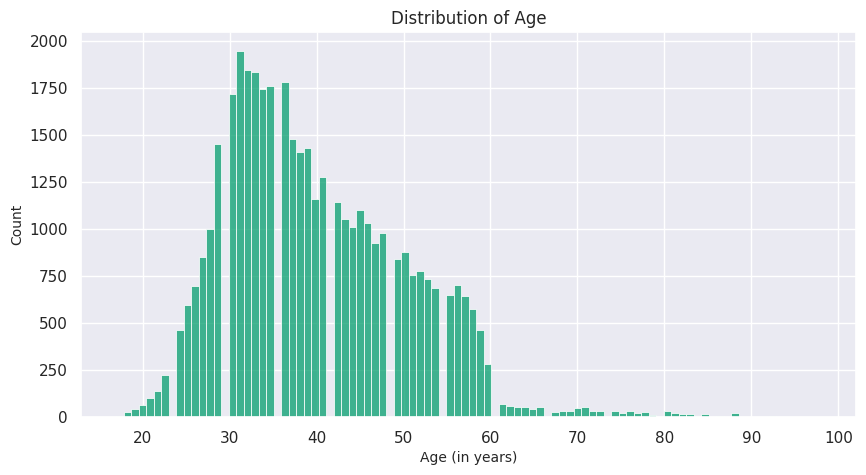

In [ ]:
age_feature = data['age']
plt.figure(figsize=(10,5))
sns.histplot(age_feature,color='#059e6e')
plt.title('Distribution of Age')
plt.xlabel("Age (in years)",fontsize=10)
plt.ylabel("Count",fontsize=10)
plt.show()

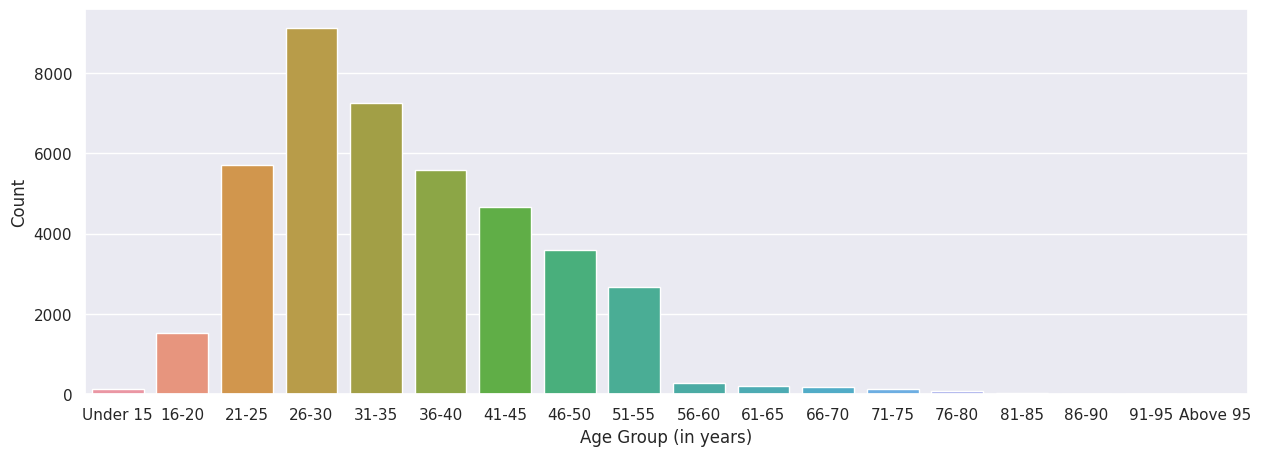

In [ ]:
#Plotting Age Group
plt.figure(figsize=(15,5), facecolor='w')
sns.countplot(x=data['Age_Group'])
plt.ylabel("Count")
plt.xlabel("Age Group (in years)")
plt.show()

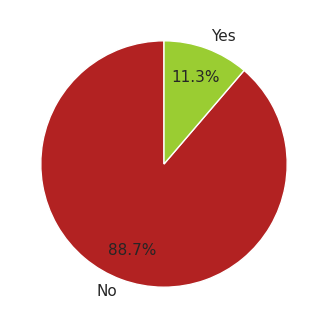

In [ ]:
#Plotting the target variable which tells whether client has subscribed a term deposit or not
plt.figure(figsize = (4,4))
plt.pie(data['subs'].value_counts(),labels=['No','Yes'],autopct='%1.1f%%',pctdistance=0.75, colors = ['firebrick','yellowgreen'],
        startangle = 90,textprops={'fontsize': 11})
plt.show()

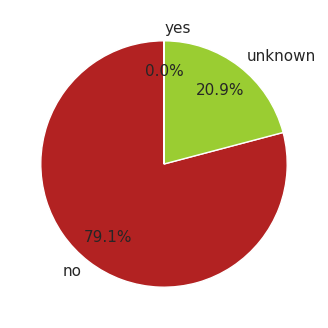

In [ ]:
#Plotting the default variable that tells whether credit is in default or not
plt.figure(figsize = (4,4))
labels=data['default'].value_counts().index
plt.pie(data['default'].value_counts(),labels=labels,autopct='%1.1f%%',pctdistance=0.75, colors = ['firebrick','yellowgreen',"gold"],
        startangle = 90,textprops={'fontsize': 11})
plt.show()

In [ ]:
data.default.value_counts()

no         32577
unknown     8596
yes            3
Name: default, dtype: int64

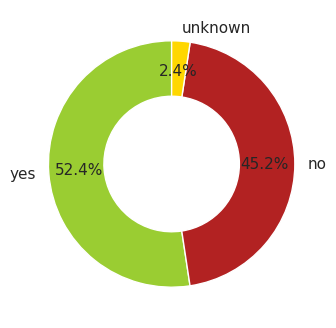

In [ ]:
#Plotting the housing variable that tells whether consumer has housing loan or not
plt.figure(figsize = (4,4))
labels=data['housing'].value_counts().index
plt.pie(data['housing'].value_counts(),labels=labels,autopct='%1.1f%%',pctdistance=0.75, colors = ['yellowgreen','firebrick',"gold"],
        startangle = 90,wedgeprops = {'width' : 0.45},textprops={'fontsize': 11})
plt.show()

In [ ]:
data.housing.value_counts()

yes        21571
no         18615
unknown      990
Name: housing, dtype: int64

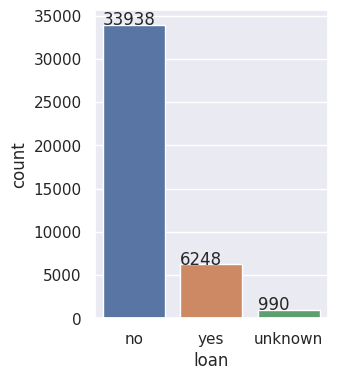

In [ ]:
#Plotting the personal loan variable
plt.figure(figsize = (3,4))
ax=sns.countplot(x=data['loan'])
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x(),p.get_height()))
plt.show()

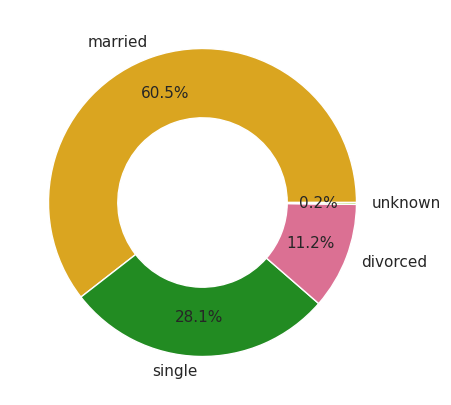

In [ ]:
#Plotting the marital status of population
labels=data['marital'].value_counts().index
plt.figure(figsize = (5,5))
plt.pie(data['marital'].value_counts(),labels=labels,autopct='%1.1f%%',pctdistance=0.75, colors = ["goldenrod","forestgreen","palevioletred","yellowgreen"],
        wedgeprops = {'width' : 0.45}, textprops = {'fontsize' : 11})
plt.show()

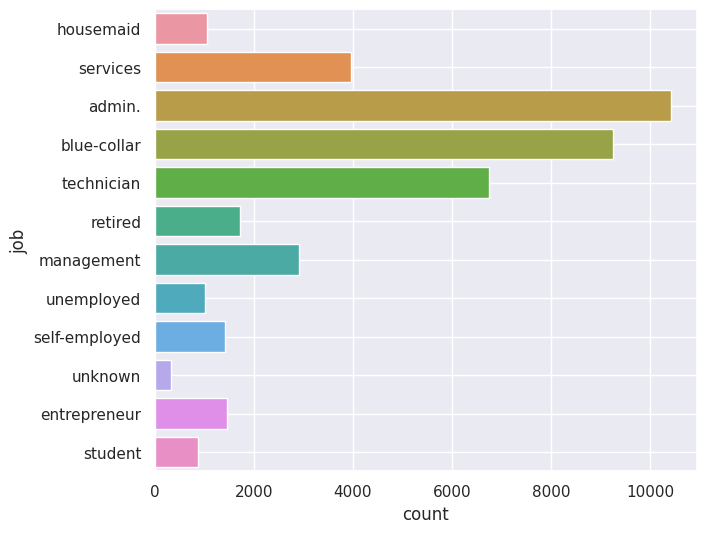

In [ ]:
#Distribution of clients as per job
plt.figure(figsize = (7,6))
sns.countplot(data = data, y = 'job')
plt.grid(visible=True)
plt.show()

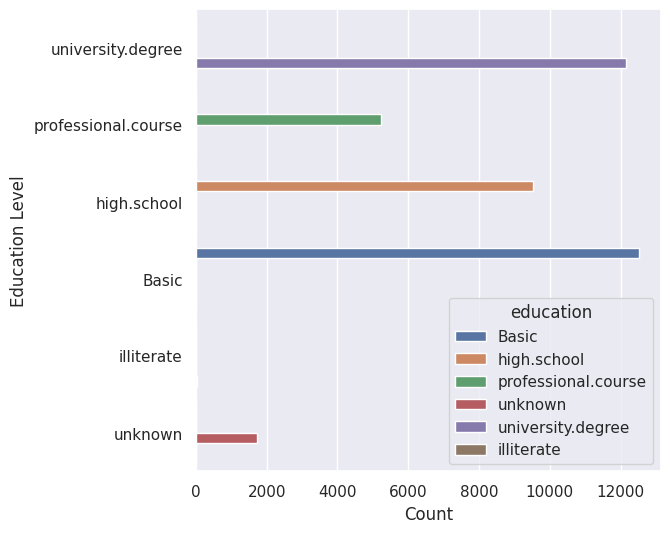

In [ ]:
#distribution as per education level
ed_order = ['university.degree', 'professional.course', 'high.school', 'Basic', 'illiterate', 'unknown']
plt.figure(figsize = (6,6))
sns.countplot(data = data, y = 'education', order = ed_order, hue= data['education'])
plt.xlabel("Count")
plt.ylabel("Education Level")
plt.show()

In [ ]:
data.education.value_counts()

Basic                  12512
university.degree      12164
high.school             9512
professional.course     5240
unknown                 1730
illiterate                18
Name: education, dtype: int64

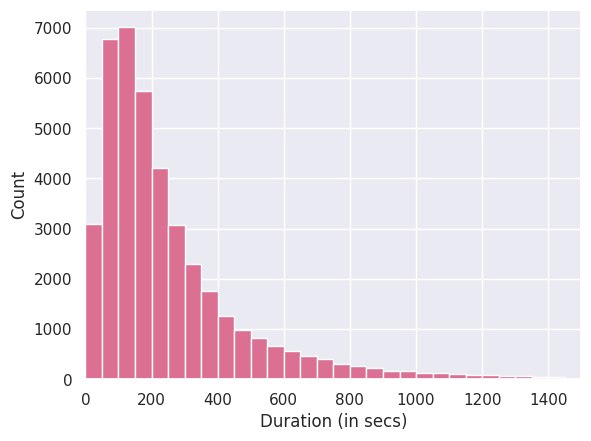

In [ ]:
#Distribution of duration variable
d_bins = np.arange(0, 1500, 50)
plt.hist(data = data, x = 'duration', bins = d_bins, color = "palevioletred")
plt.xlim(0,1500)
plt.ylabel("Count")
plt.xlabel("Duration (in secs)")
plt.show()

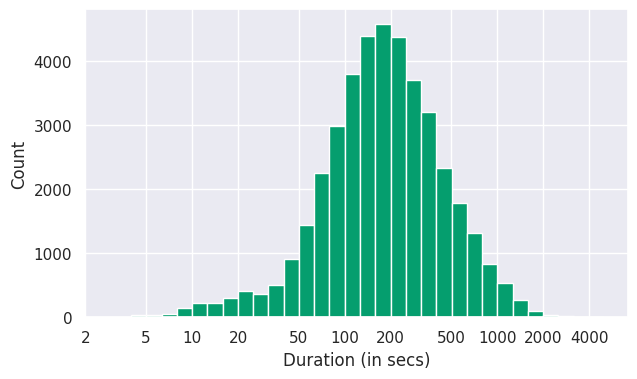

In [ ]:
#Plotting duration with log scale
plt.figure(figsize = (7,4))

binsize = .1
x_bins = 10 ** np.arange(0.6, np.log10(data['duration'].max()) + binsize, binsize)

plt.hist(data = data, x = 'duration', bins = x_bins, color='#059e6e')
plt.xscale('log')
tick_locs = [2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000, 4000]
plt.xticks(tick_locs, tick_locs)
plt.grid(visible=True)
plt.ylabel("Count")
plt.xlabel("Duration (in secs)")
plt.show()

In [ ]:
data.duration.value_counts()

90      170
85      170
136     168
73      167
124     163
       ... 
1569      1
1053      1
1263      1
1169      1
1868      1
Name: duration, Length: 1544, dtype: int64

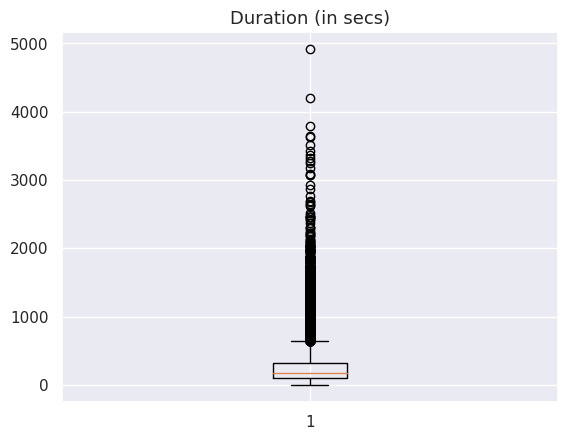

In [ ]:
#finding outliers in duration variable
plt.boxplot(data = data, x = 'duration')
plt.title("Duration (in secs)",fontsize=13)
plt.show()

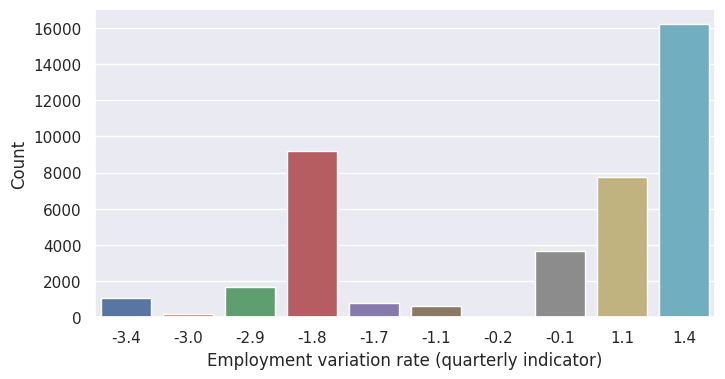

In [ ]:
#Count of different Employment variation rates
plt.figure(figsize=(8, 4))
sns.countplot(x=data['emp.var.rate'],hue_order=data['emp.var.rate'])
plt.ylabel("Count")
plt.xlabel("Employment variation rate (quarterly indicator)")
plt.show()

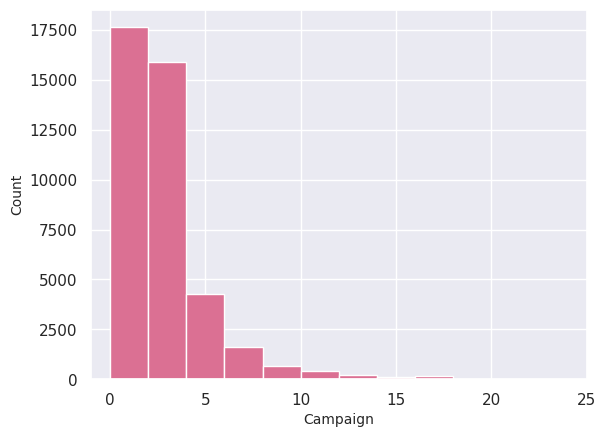

In [ ]:
#Distribution of campaign days
d_bins = np.arange(0, 20, 2)
plt.hist(data = data, x = 'campaign', bins = d_bins, color = "palevioletred")
plt.xlim(-1,25)
plt.xlabel("Campaign",fontsize=10)
plt.ylabel("Count",fontsize=10)
plt.show()

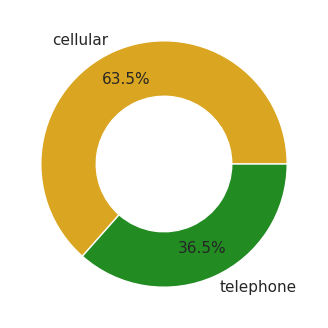

In [ ]:
#Plotting the contact variable
labels=data['contact'].value_counts().index
plt.figure(figsize = (4,4))
plt.pie(data['contact'].value_counts(),labels=labels,autopct='%1.1f%%',pctdistance=0.75, colors = ["goldenrod","forestgreen"],
        wedgeprops = {'width' : 0.45}, textprops = {'fontsize' : 11})
plt.show()

In [ ]:
data.contact.value_counts()

cellular     26135
telephone    15041
Name: contact, dtype: int64

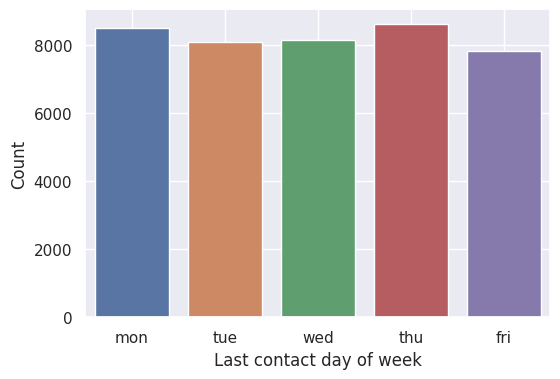

In [ ]:
#Distribution of clients as per day of week
plt.figure(figsize = (6,4))
sns.countplot(x = data['day_of_week'], hue_order = data['day_of_week'])
plt.ylabel("Count")
plt.xlabel("Last contact day of week")
plt.grid(visible=True)
plt.show()

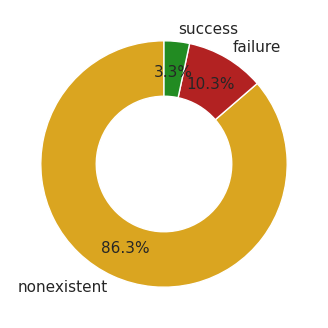

In [ ]:
#plotting previous campaign outcome
labels = data['poutcome'].value_counts().index

plt.figure(figsize = (5,4))
plt.pie(data['poutcome'].value_counts(), labels = labels, autopct='%1.1f%%', pctdistance=0.75,
        colors = ["goldenrod","firebrick","forestgreen"], startangle = 90,
        wedgeprops = {'width' : 0.45}, textprops = {'fontsize' : 11})
plt.show()

['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']


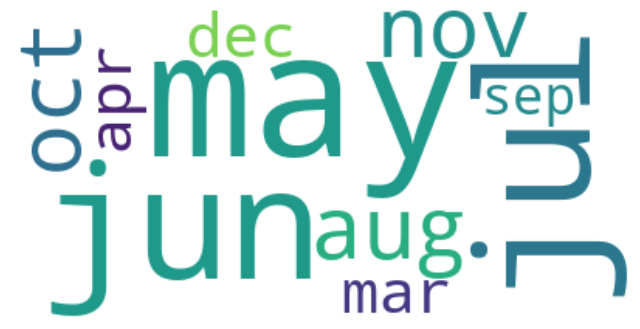

In [ ]:
#word cloud for month variable
contact=data["month"].unique()
print(contact)
text=' '
for val in contact:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    text += " ".join(tokens)+" "
word_cloud = WordCloud(background_color = 'white',min_font_size = 5).generate(text)
plt.figure(figsize = (8,8))
plt.imshow(word_cloud,interpolation="bilinear")
plt.axis("off")
plt.show()

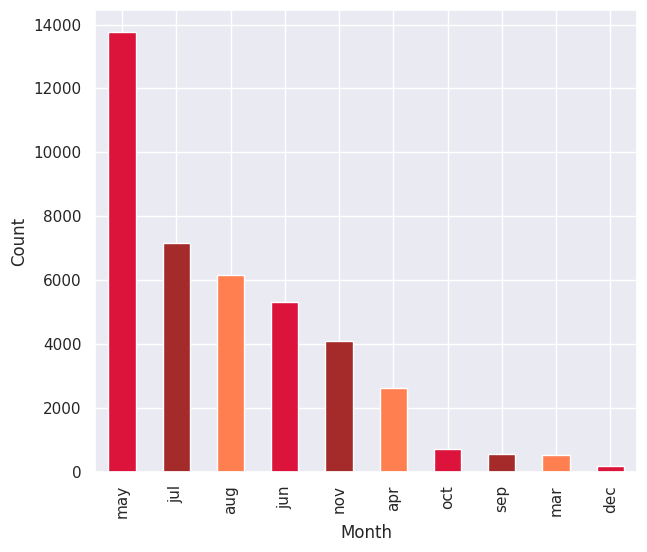

In [ ]:
#Distribution of clients as per month
month_wise = data["month"].str.split(', ', expand=True)
mwise=month_wise.stack()
mwise.value_counts(ascending=True)
mwise.value_counts().plot(kind='bar', figsize=(7,6),color=['crimson','brown','coral'])
plt.ylabel("Count")
plt.xlabel("Month")
plt.show()

In [ ]:
data.month.value_counts()

may    13767
jul     7169
aug     6176
jun     5318
nov     4100
apr     2631
oct      717
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [ ]:
#Count of different number of passed days after last contact with client
print(data['pdays'].value_counts(ascending=True))

 20        1
 27        1
 26        1
 25        1
 21        2
 22        3
 19        3
 18        7
 17        8
 16       11
 0        15
 8        18
 14       20
 15       24
 1        26
 11       28
 13       36
 5        46
 10       52
 12       58
 7        60
 2        61
 9        64
 4       118
 6       412
 3       439
-1     39661
Name: pdays, dtype: int64


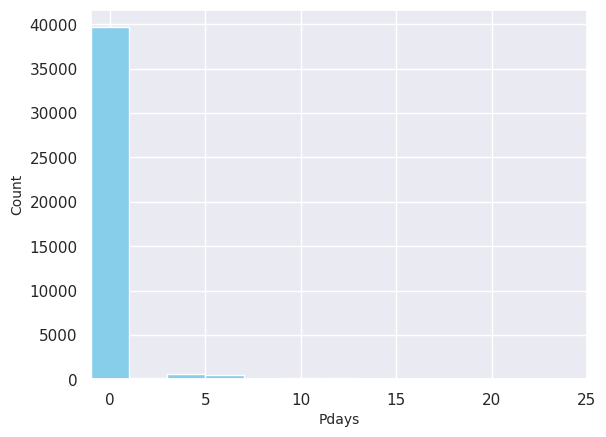

In [ ]:
#distribution of pdays variable
d_bins = np.arange(-1, 30, 2)
plt.hist(data = data, x = 'pdays', bins = d_bins, color = "skyblue")
plt.xlim(-1,25)
plt.xlabel("Pdays",fontsize=10)
plt.ylabel("Count",fontsize=10)
plt.show()

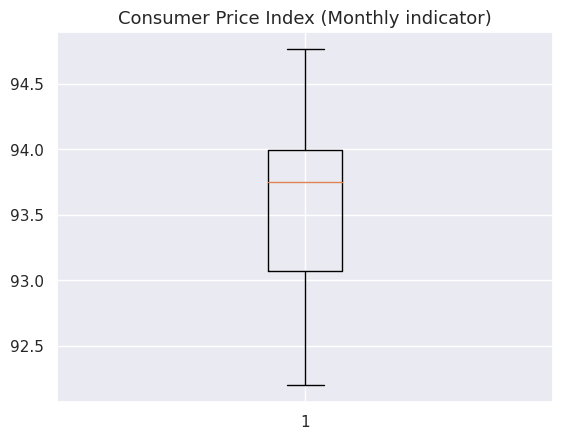

In [ ]:
#Distribution of consumer price index
plt.boxplot(data = data, x = 'cons.price.idx')
plt.title("Consumer Price Index (Monthly indicator)",fontsize=13)
plt.show()

In [ ]:
data['cons.price.idx'].mean()

93.5757198853701

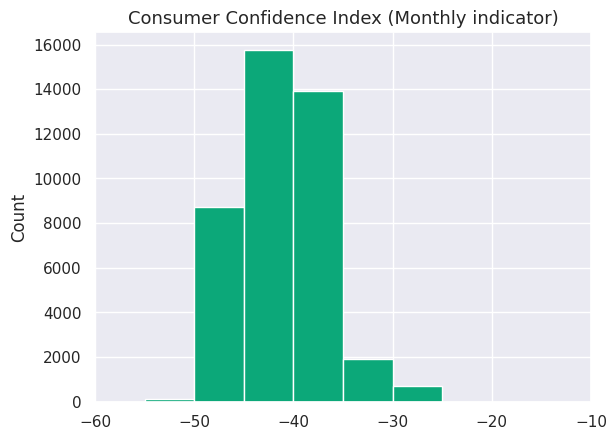

In [ ]:
#Distribution of consumer confidence index - Monthly indicator
d_bins = np.arange(-60, 10, 5)
plt.hist(data = data, x = 'cons.conf.idx', bins = d_bins, color = "#0ca879")
plt.xlim(-60,-10)
plt.title("Consumer Confidence Index (Monthly indicator)",fontsize=13)
plt.ylabel("Count")
plt.show()

In [ ]:
data['cons.conf.idx'].mean()

-40.502863318437925

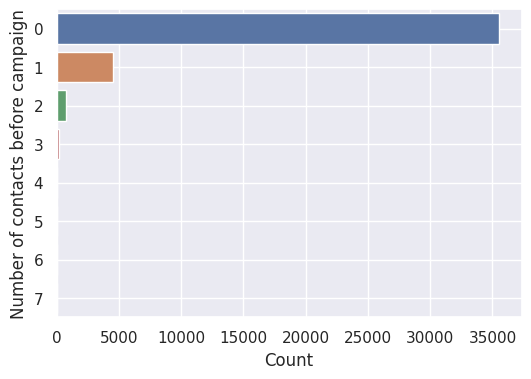

In [ ]:
#Distribution of number of contacts performed before this campaign and for this client
plt.figure(figsize = (6,4))
sns.countplot(data = data, y = 'previous')
plt.xlabel("Count")
plt.ylabel("Number of contacts before campaign")
plt.grid(visible=True)
plt.show()

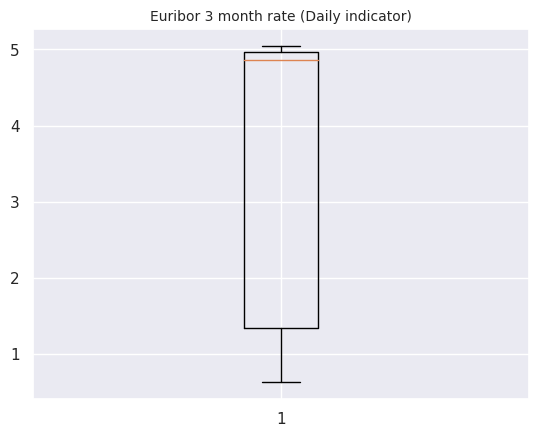

In [ ]:
#Distribution of euribor 3 month rate - daily indicator
plt.boxplot(data = data, x = 'euribor3m')
plt.title("Euribor 3 month rate (Daily indicator)",fontsize=10)
plt.show()

In [ ]:
data['euribor3m'].mean()

3.621293447639401

In [ ]:
data['euribor3m'].value_counts()

4.857    2868
4.962    2611
4.963    2487
4.961    1902
4.856    1210
         ... 
3.853       1
3.901       1
0.969       1
0.956       1
3.669       1
Name: euribor3m, Length: 316, dtype: int64

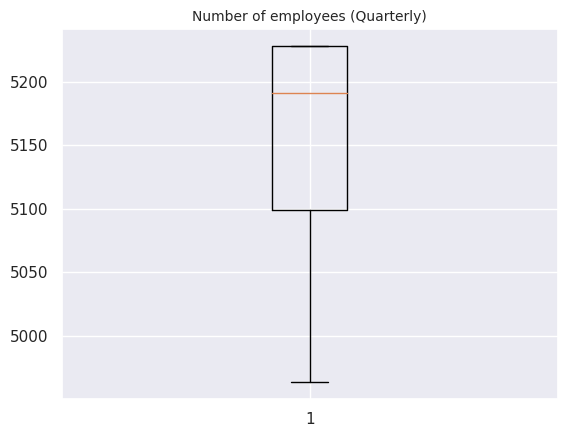

In [ ]:
#Distribution of Number of employees (Quarterly)
plt.boxplot(data = data, x = 'nr.employed')
plt.title("Number of employees (Quarterly)",fontsize=10)
plt.show()

In [ ]:
data['nr.employed'].mean()

5167.034869827084

In [ ]:
data['nr.employed'].value_counts()

5228.1    16228
5099.1     8532
5191.0     7762
5195.8     3682
5076.2     1662
5017.5     1070
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: nr.employed, dtype: int64

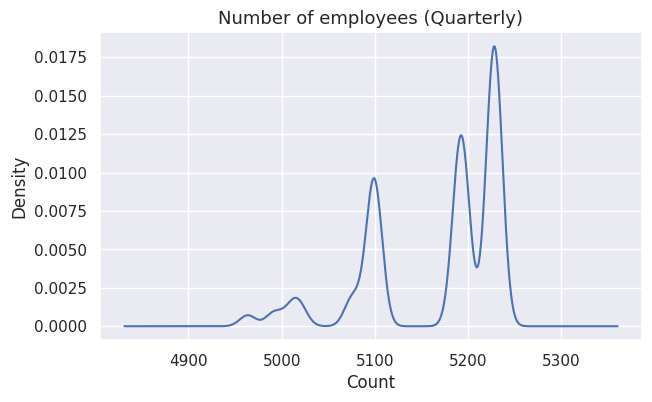

In [ ]:
#Distribution of Number of employees (Quarterly)
plt.figure(figsize = (7,4))
data['nr.employed'].plot(kind='density')
plt.xlabel("Count")
plt.ylabel("Density")
plt.title("Number of employees (Quarterly)",fontsize=13)
plt.grid(visible=True)
plt.show()

##Bivariate Analysis

Text(0, 0.5, 'Frequency of Purchase')

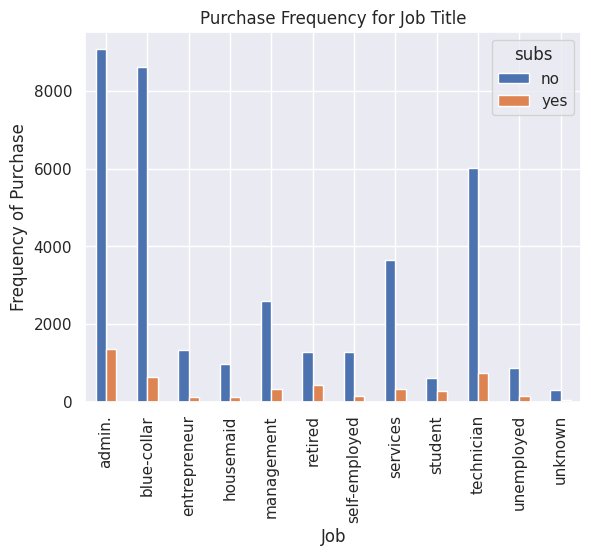

In [ ]:
#Purchase frequency for job title
%matplotlib inline
pd.crosstab(data.job,data.subs).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')

<ipython-input-56-c463760a1929>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  graph_1 = data.groupby('age', as_index=False).mean()


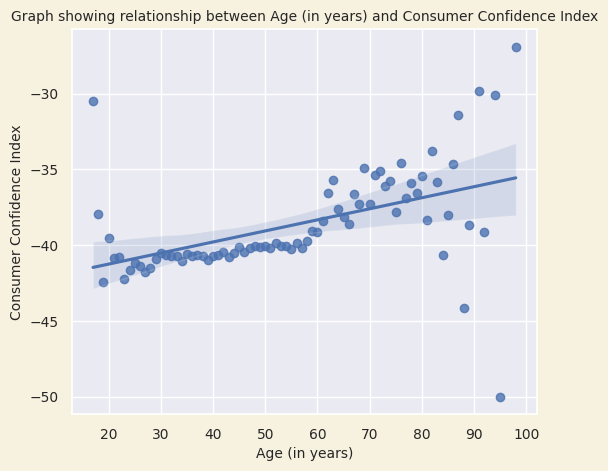

In [ ]:
#relationship between Age (in years) and Consumer Confidence Index
graph_1 = data.groupby('age', as_index=False).mean()
plt.figure(figsize=(6,5), facecolor='#f7f1df')
sns.regplot(x=graph_1['age'], y=graph_1['cons.conf.idx'])
plt.title("Graph showing relationship between Age (in years) and Consumer Confidence Index", size=10)
plt.xlabel("Age (in years)", size=10)
plt.ylabel("Consumer Confidence Index", size=10)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

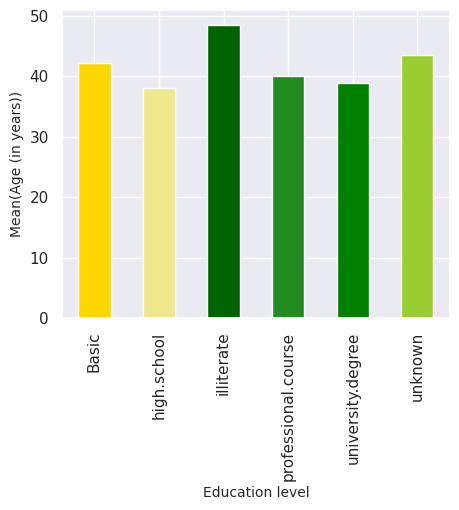

In [ ]:
#Mean of age according to education
eduwiseage=data.groupby('education')['age'].mean()
eduwiseage.plot.bar(figsize=(5,4), color= ["gold","khaki","darkgreen","forestgreen","green","yellowgreen"])
plt.ylabel("Mean(Age (in years))", size=10)
plt.xlabel("Education level", size=10)
plt.show()

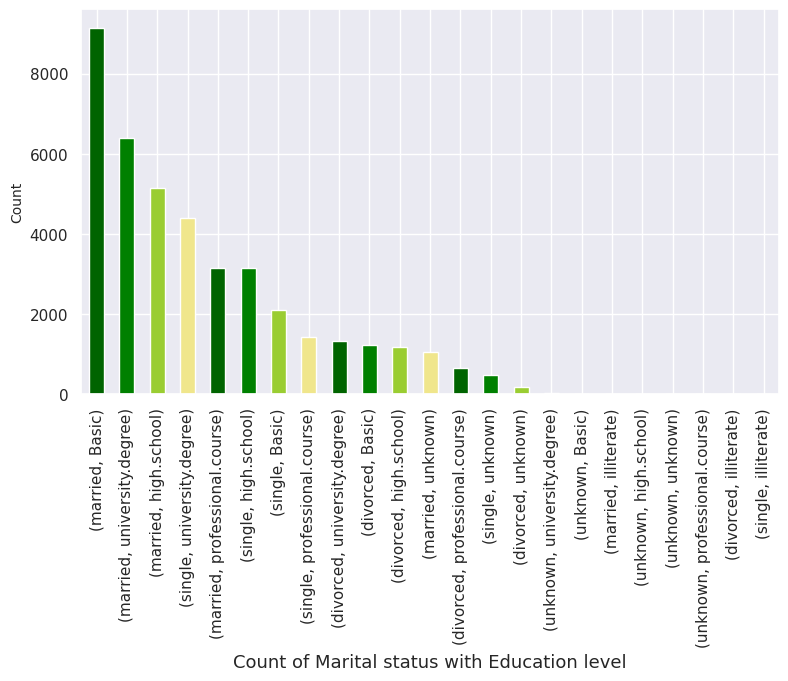

In [ ]:
edubymarital=data.groupby('marital')['education'].value_counts().sort_values(ascending=False)
edubymarital.plot.bar(figsize=(9,5), color= ["darkgreen","green","yellowgreen","khaki"])
plt.xlabel("Count of Marital status with Education level", size=13)
plt.ylabel("Count", size=10)
plt.show()

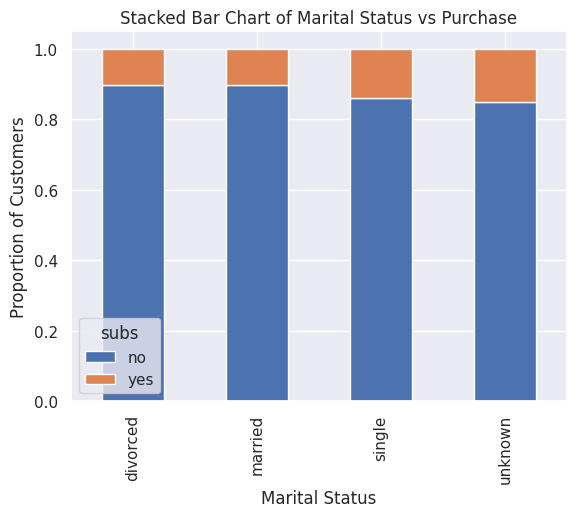

In [ ]:
#marital status vs purchase
table=pd.crosstab(data.marital,data.subs)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title("Stacked Bar Chart of Marital Status vs Purchase")
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.show()

<Figure size 1200x1200 with 0 Axes>

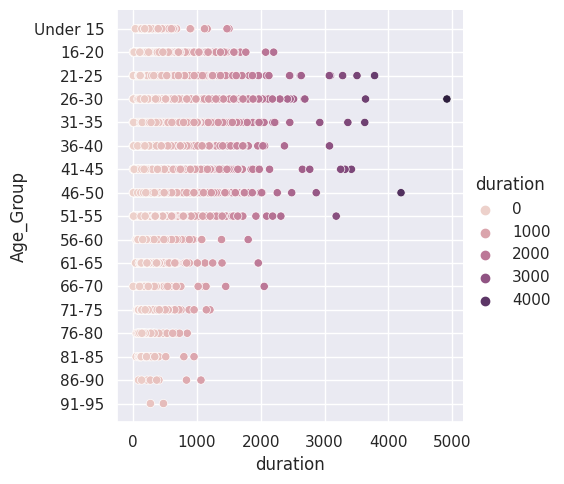

In [ ]:
plt.figure(figsize=(12, 12))
sns.relplot(data=data, x="duration", y="Age_Group",hue='duration')
plt.show()

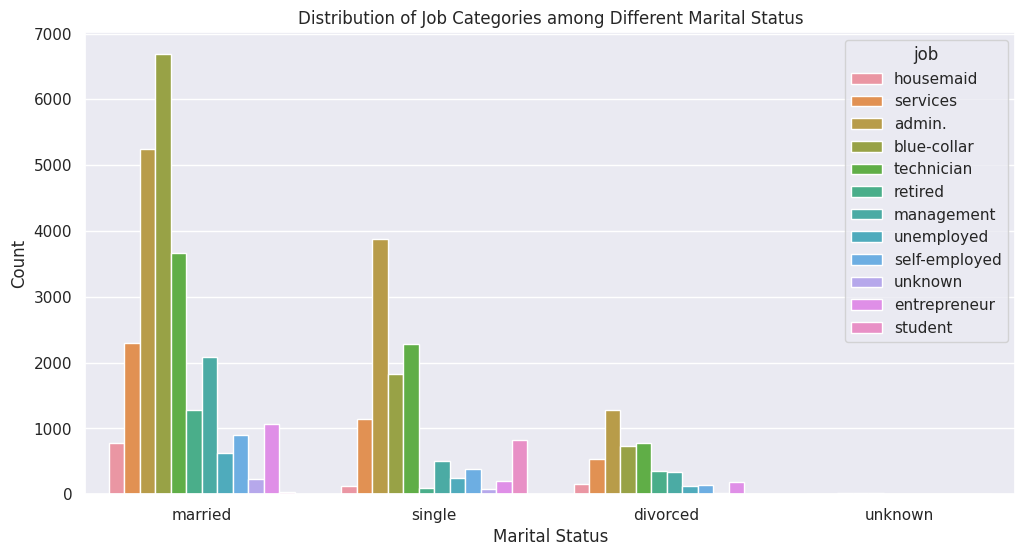

In [ ]:
# Countplot of Job categories by Marital status
plt.figure(figsize=(12, 6))
sns.countplot(x='marital', hue='job', data=data)
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Distribution of Job Categories among Different Marital Status')
plt.show()

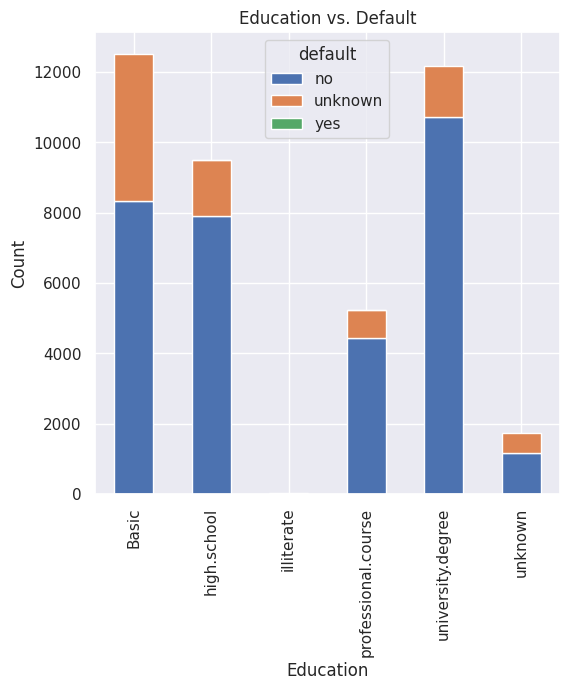

In [ ]:
# Cross-tabulation of Education and Default
cross_tab = pd.crosstab(data['education'], data['default'])
cross_tab.plot(kind='bar', stacked=True, figsize=(6, 6))
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Education vs. Default')
plt.show()

<Figure size 400x400 with 0 Axes>

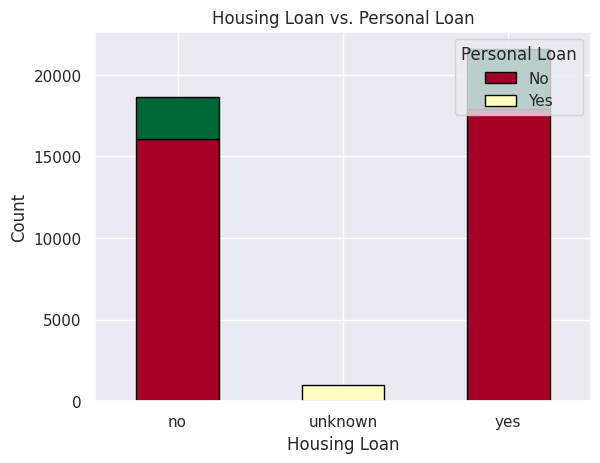

In [ ]:
# Cross-tabulation of Housing Loan and Personal Loan
cross_tab = pd.crosstab(data['housing'], data['loan'])
# Create a stacked bar plot
plt.figure(figsize=(4, 4))
cross_tab.plot(kind='bar', stacked=True, colormap='RdYlGn', edgecolor='black')
plt.xlabel('Housing Loan')
plt.ylabel('Count')
plt.title('Housing Loan vs. Personal Loan')
plt.legend(title='Personal Loan', loc='upper right', labels=['No', 'Yes'])
plt.xticks(rotation=0)
plt.show()


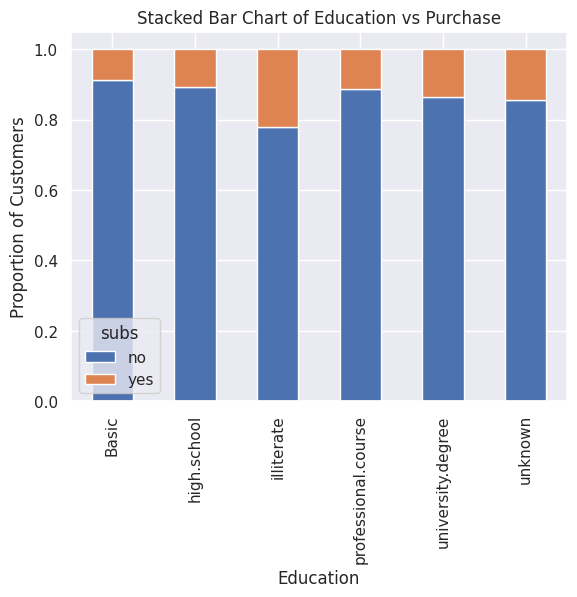

In [ ]:
#education vs purchase
table=pd.crosstab(data.education,data.subs)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title("Stacked Bar Chart of Education vs Purchase")
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.show()

Text(0, 0.5, 'Frequency of Purchase')

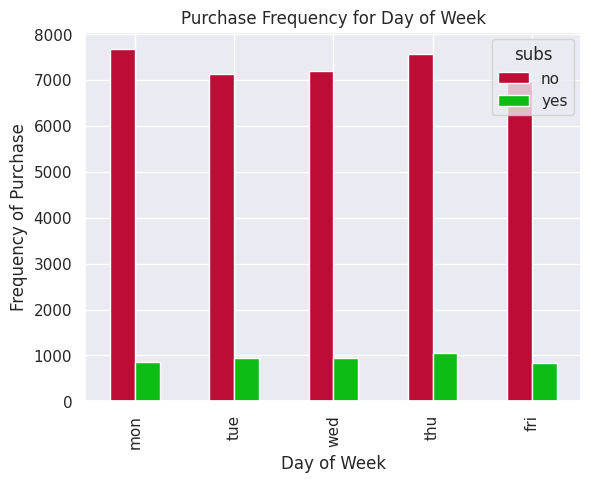

In [ ]:
#Purchase Frequency for Day of Week
order=['mon','tue','wed','thu','fri']
data.day_of_week=pd.Categorical(data.day_of_week,categories=order,ordered=True)
pd.crosstab(data.day_of_week,data.subs).sort_values('day_of_week').plot(kind='bar',color=['#bd0d36','#0dbd16'])
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')

Text(0, 0.5, 'Frequency of Purchase')

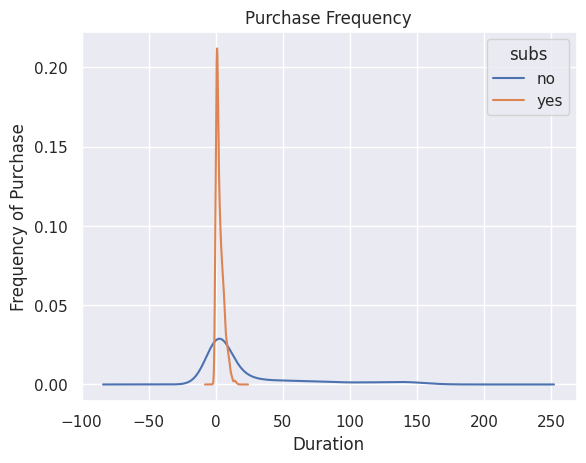

In [ ]:
pd.crosstab(data.duration,data.subs).plot(kind='density')
plt.title('Purchase Frequency')
plt.xlabel('Duration')
plt.ylabel('Frequency of Purchase')

##Multivariate Analysis

In [ ]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subs', 'Age_Group'],
      dtype='object')

In [ ]:
pair_data=data[['Age_Group','marital','default','day_of_week','month','job','poutcome','education','housing','loan','contact','day_of_week','duration','campaign','pdays','previous','subs']]

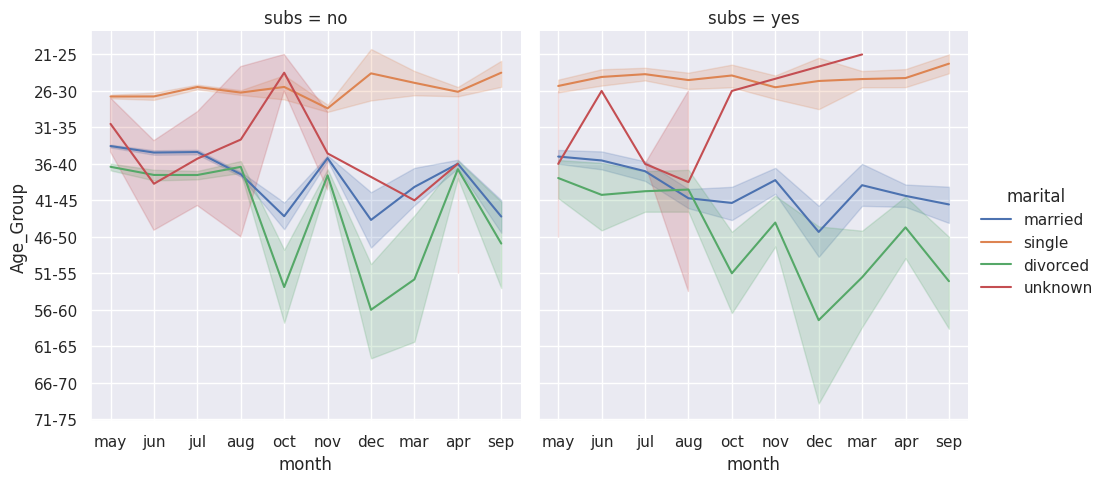

In [ ]:
g = sns.relplot(x="month", y="Age_Group", hue="marital", col="subs", data=pair_data,kind='line')

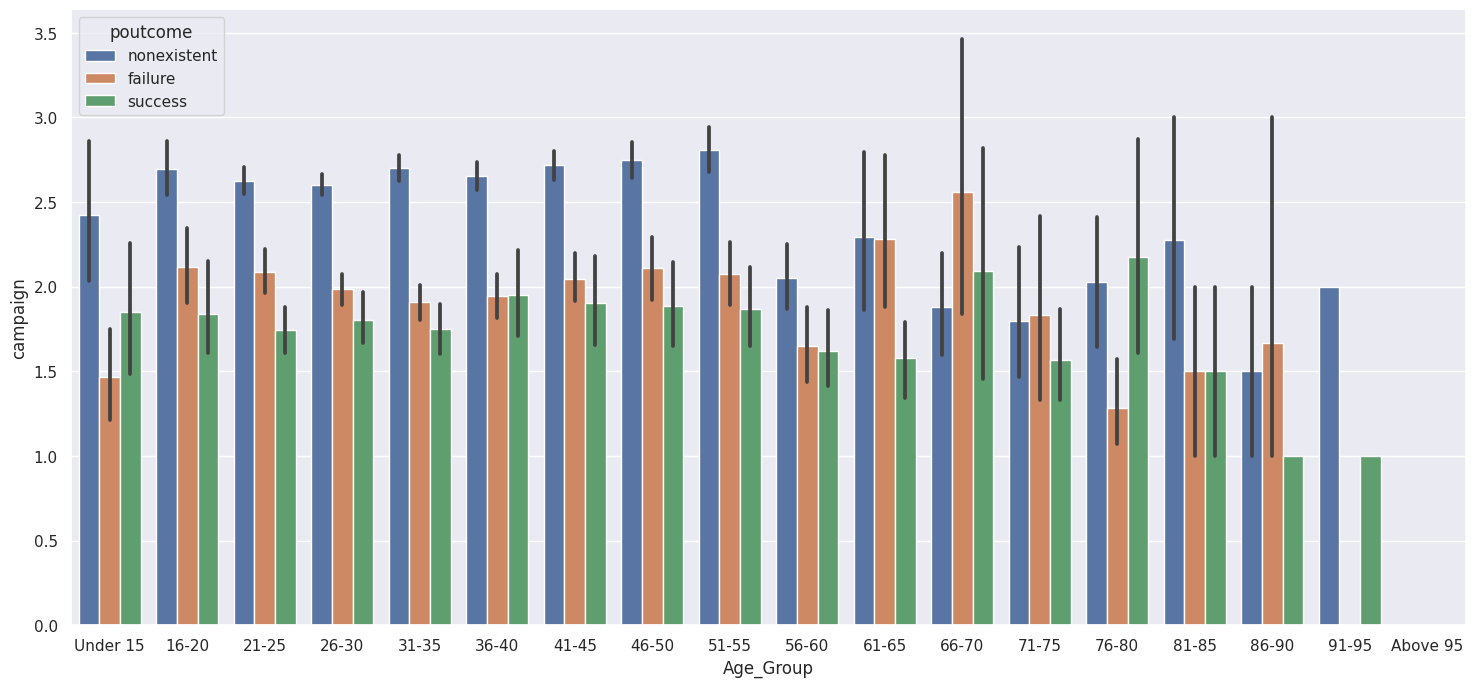

In [ ]:
plt.figure(figsize=(18,8))
g1 = sns.barplot(x="Age_Group", y="campaign", hue='poutcome', data=pair_data)

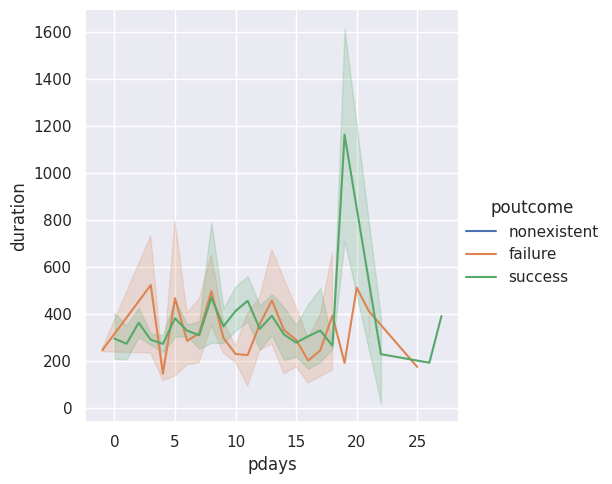

In [ ]:
g2=sns.relplot(data=pair_data,x="pdays",y="duration", hue="poutcome",kind="line")

In [ ]:
pair_data['poutcome'].value_counts()

nonexistent    35551
failure         4252
success         1373
Name: poutcome, dtype: int64

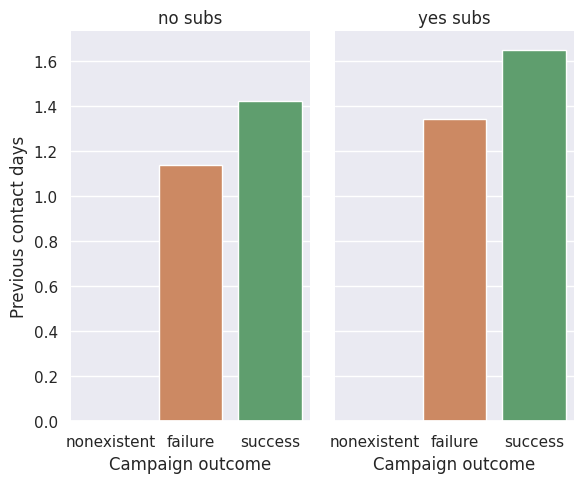

In [ ]:
g3 = sns.catplot(x="poutcome", y="previous", col="subs",data=pair_data,kind="bar", errorbar=None, aspect=.6)
(g3.set_axis_labels("Campaign outcome", "Previous contact days")
  .set_xticklabels(["nonexistent", "failure","success"])
  .set_titles("{col_name} {col_var}")
  .despine(left=True))

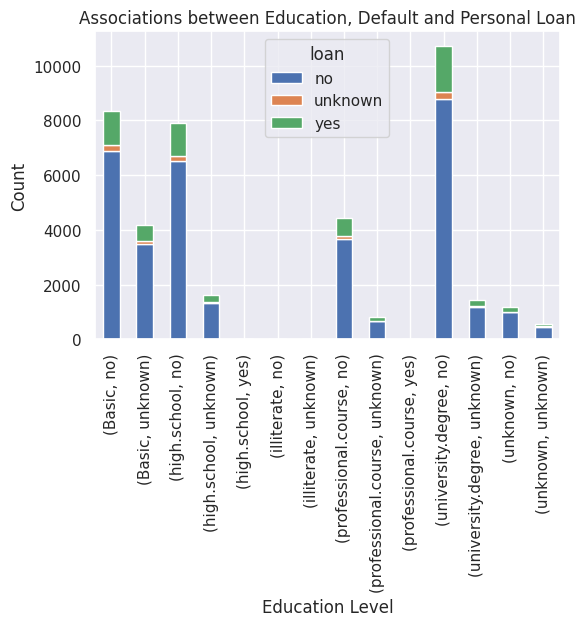

In [ ]:
# Group the data by 'education', 'default', and 'loan' and count the occurrences
grouped_data = data.groupby(['education', 'default', 'loan']).size().unstack(fill_value=0)
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(6, 4))
ax.set_xlabel('Education Level')
ax.set_ylabel('Count')
ax.set_title('Associations between Education, Default and Personal Loan')
plt.show()

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic
crosstable=pd.crosstab(pair_data['marital'],pair_data['subs'])
crosstable

subs         no   yes
marital              
divorced   4135   476
married   22390  2531
single     9944  1620
unknown      68    12

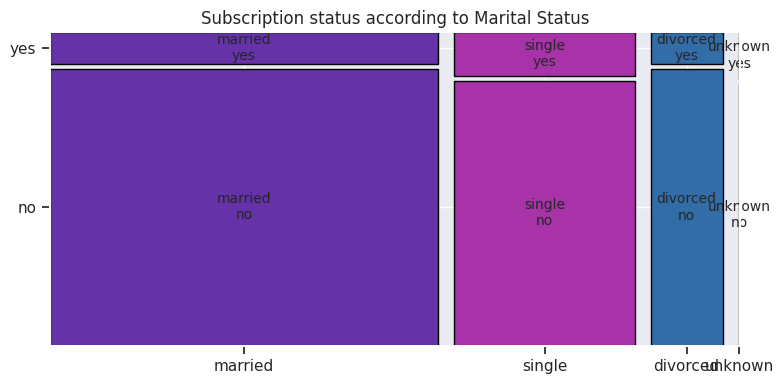

In [ ]:
props={}
props[('single','yes')]={'facecolor':'#a832a8', 'edgecolor':'black'}
props[('single','no')]={'facecolor':'#a832a8', 'edgecolor':'black'}
props[('married','yes')]={'facecolor':'#6632a8', 'edgecolor':'black'}
props[('married','no')]={'facecolor':'#6632a8', 'edgecolor':'black'}
props[('divorced','yes')]={'facecolor':'#326da8','edgecolor':'black'}
props[('divorced','no')]={'facecolor':'#326da8','edgecolor':'black'}
props[('unknown','yes')]={'facecolor':'red','edgecolor':'black'}
props[('unknown','no')]={'facecolor':'red','edgecolor':'black'}
plt.rcParams["figure.figsize"] = [8,4]
plt.rcParams["figure.autolayout"] = True
mosaic(pair_data,['marital','subs'],title='Subscription status according to Marital Status',properties=props,gap=0.025)
plt.show()

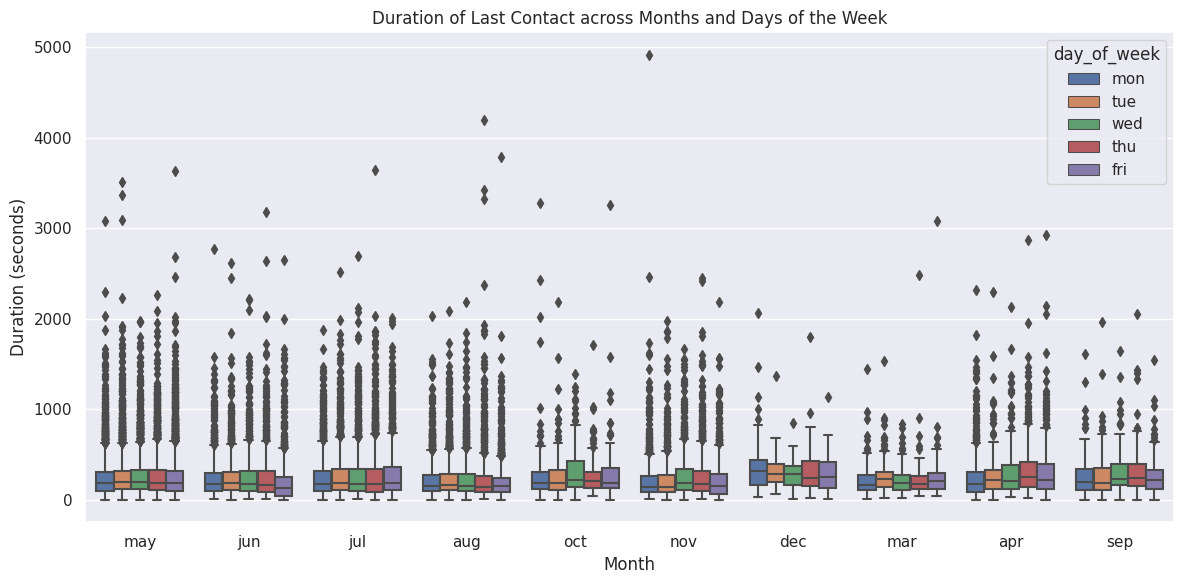

In [ ]:
# Duration of last contact across Months and Days of the Week
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='month', y='duration', hue='day_of_week', data=data)
ax.set_xlabel('Month')
ax.set_ylabel('Duration (seconds)')
ax.set_title('Duration of Last Contact across Months and Days of the Week')
plt.show()

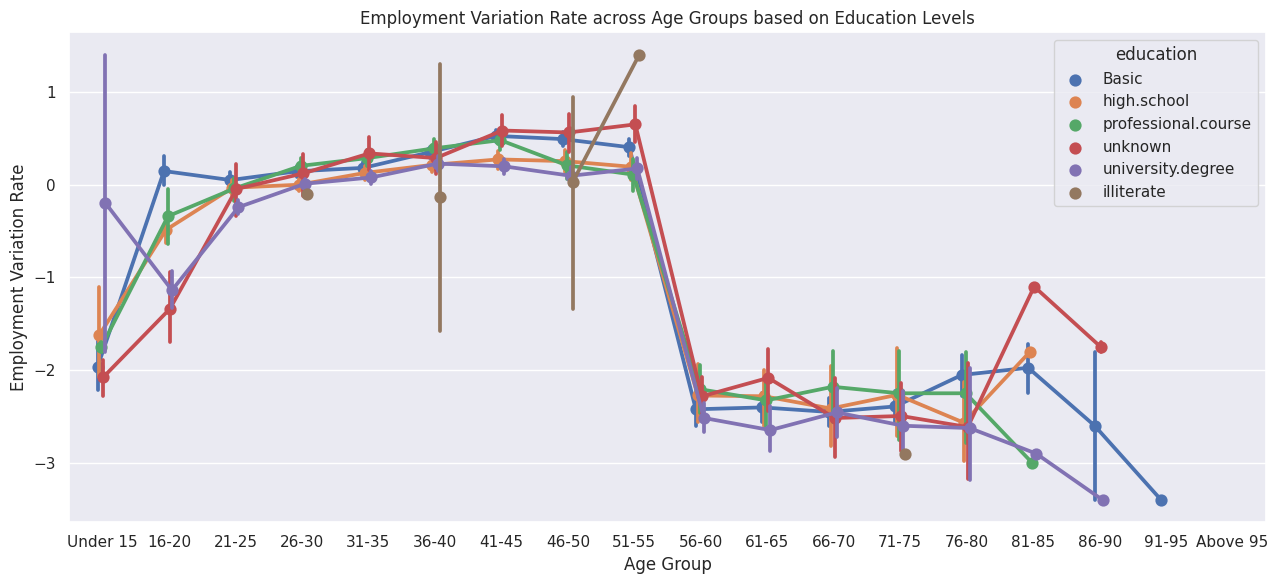

In [ ]:
# point plot
plt.figure(figsize=(13, 6))
ax = sns.pointplot(x='Age_Group', y='emp.var.rate', hue='education', data=data,dodge=True)
ax.set_xlabel('Age Group')
ax.set_ylabel('Employment Variation Rate')
ax.set_title('Employment Variation Rate across Age Groups based on Education Levels')
plt.show()

<Figure size 1200x600 with 0 Axes>

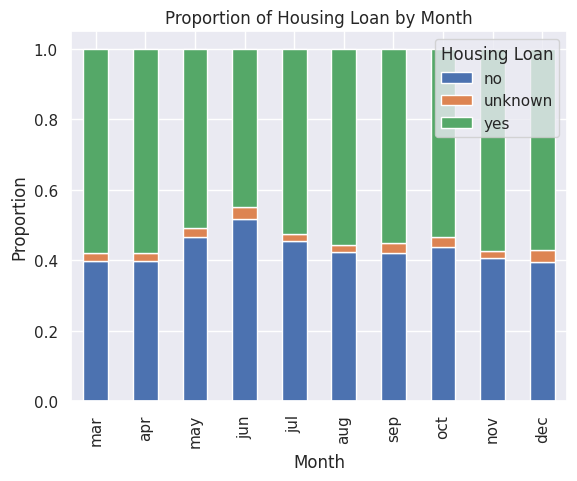

In [ ]:
# Create a bar plot for housing loan by month
plt.figure(figsize=(12, 6))
monthorder=['mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
data.month=pd.Categorical(data.month,categories=monthorder,ordered=True)
ax2 = data.sort_values('month').groupby('month')['housing'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)
ax2.set_xlabel('Month')
ax2.set_ylabel('Proportion')
ax2.set_title('Proportion of Housing Loan by Month')
plt.legend(title='Housing Loan', loc='upper right')
plt.show()

In [ ]:
# Create the contingency table
contingency_table = pd.crosstab(index=data['default'], columns=[data['housing'], data['loan']], margins=True)
print(contingency_table)

housing     no       unknown    yes          All
loan        no   yes unknown     no   yes       
default                                         
no       12600  2008     763  14238  2968  32577
unknown   3456   549     227   3641   723   8596
yes          2     0       0      1     0      3
All      16058  2557     990  17880  3691  41176


<ipython-input-25-542b7f21b2e9>:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  contingency_table_heatmap = contingency_table.drop('All', axis=0).drop('All', axis=1)


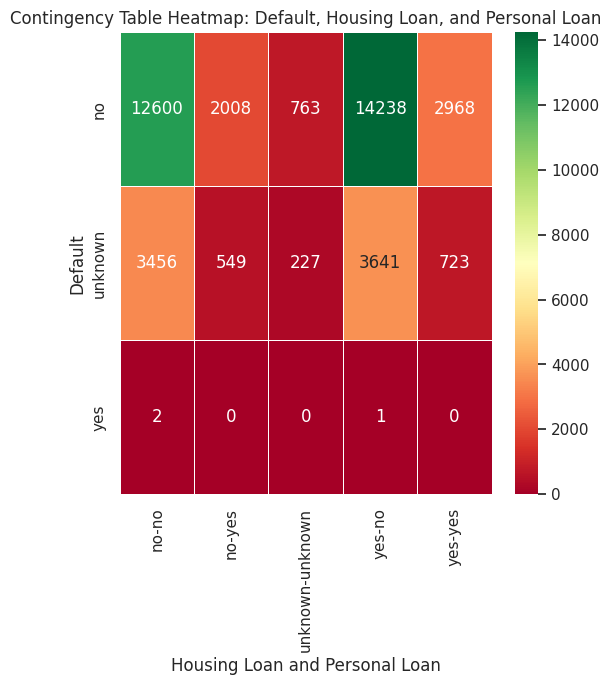

In [ ]:
# Drop the 'All' row and column from the contingency table for the heatmap
contingency_table_heatmap = contingency_table.drop('All', axis=0).drop('All', axis=1)
plt.figure(figsize=(6, 6))
sns.heatmap(contingency_table_heatmap, annot=True, fmt='d', cmap='RdYlGn', linewidths=0.5)
plt.title('Contingency Table Heatmap: Default, Housing Loan, and Personal Loan')
plt.xlabel('Housing Loan and Personal Loan')
plt.ylabel('Default')
plt.show()

In [14]:
data['job'].replace({"admin.":1,"blue-collar":2,"entrepreneur":3,"housemaid":4,"management":5,"retired":6,"self-employed":7,"services":8,"student":9,"technician":10,"unemployed":0,"unknown":11},inplace=True)
data["marital"].replace({"divorced":1,"married":2,"single":3,"unknown":0},inplace=True)
data["default"].replace({"no":1,"yes":2,"unknown":0},inplace=True)
data["housing"].replace({"no":1,"yes":2,"unknown":0},inplace=True)
data["loan"].replace({"no":1,"yes":2,"unknown":0},inplace=True)
data["contact"].replace({"cellular":1,"telephone":2},inplace=True)
data["month"].replace({"jan":1,"feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12},inplace=True)
data["day_of_week"].replace({"mon":1,"tue":2,"wed":3,"thu":4,"fri":5,"sat":6,"sun":7},inplace=True)
data["poutcome"].replace({"failure":0,"nonexistent":1,"success":2},inplace=True)
data["subs"].replace({"no":0,"yes":1},inplace=True)
data["education"].replace({"Basic":1,"high.school":2,"illiterate":3,"professional.course":4,"university.degree":5,"unknown":0},inplace=True)

In [15]:
print(stats.variance(data["subs"]))

0.09997225646148941


In [ ]:
data.describe()

age           job       marital     education       default  \
count  41176.00000  41176.000000  41176.000000  41176.000000  41176.000000   
mean      40.02380      4.445284      2.164975      2.753303      0.791310   
std       10.42068      3.509047      0.611056      1.752923      0.406556   
min       17.00000      0.000000      0.000000      0.000000      0.000000   
25%       32.00000      1.000000      2.000000      1.000000      1.000000   
50%       38.00000      2.000000      2.000000      2.000000      1.000000   
75%       47.00000      8.000000      3.000000      5.000000      1.000000   
max       98.00000     11.000000      3.000000      5.000000      2.000000   

            housing          loan       contact         month   day_of_week  \
count  41176.000000  41176.000000  41176.000000  41176.000000  41176.000000   
mean       1.499830      1.127696      1.365286      6.607733      2.979600   
std        0.545979      0.399349      0.481516      2.041013      1.411539   
min        0.000000      0.000000      1.000000      3.000000      1.000000   
25%        1.000000      1.000000      1.000000      5.000000      2.000000   
50%        2.000000      1.000000      1.000000      6.000000      3.000000   
75%        2.000000      1.000000      2.000000      8.000000      4.000000   
max        2.000000      2.000000      2.000000     12.000000      5.000000   

       ...      campaign         pdays      previous      poutcome  \
count  ...  41176.000000  41176.000000  41176.000000  41176.000000   
mean   ...      2.567879     -0.741913      0.173013      0.930081   
std    ...      2.770318      1.510540      0.494964      0.362937   
min    ...      1.000000     -1.000000      0.000000      0.000000   
25%    ...      1.000000     -1.000000      0.000000      1.000000   
50%    ...      2.000000     -1.000000      0.000000      1.000000   
75%    ...      3.000000     -1.000000      0.000000      1.000000   
max    ...     56.000000     27.000000      7.000000      2.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m  \
count  41176.000000    41176.000000   41176.000000  41176.000000   
mean       0.081922       93.575720     -40.502863      3.621293   
std        1.570883        0.578839       4.627860      1.734437   
min       -3.400000       92.201000     -50.800000      0.634000   
25%       -1.800000       93.075000     -42.700000      1.344000   
50%        1.100000       93.749000     -41.800000      4.857000   
75%        1.400000       93.994000     -36.400000      4.961000   
max        1.400000       94.767000     -26.900000      5.045000   

        nr.employed          subs  
count  41176.000000  41176.000000  
mean    5167.034870      0.112663  
std       72.251364      0.316184  
min     4963.600000      0.000000  
25%     5099.100000      0.000000  
50%     5191.000000      0.000000  
75%     5228.100000      0.000000  
max     5228.100000      1.000000  

[8 rows x 21 columns]

In [17]:
correlations = data.corr(method='pearson')
correlations

<ipython-input-17-df8e0168c345>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = data.corr(method='pearson')


age       job   marital  education   default   housing  \
age             1.000000  0.002236 -0.388763  -0.106162 -0.164883 -0.000874   
job             0.002236  1.000000  0.030040   0.095953  0.035824  0.003190   
marital        -0.388763  0.030040  1.000000   0.091235  0.076804  0.012277   
education      -0.106162  0.095953  0.091235   1.000000  0.197082  0.021501   
default        -0.164883  0.035824  0.076804   0.197082  1.000000  0.017401   
housing        -0.000874  0.003190  0.012277   0.021501  0.017401  1.000000   
loan           -0.006041 -0.008047  0.006426   0.014715  0.007822  0.228667   
contact         0.006917 -0.029991 -0.053601  -0.119595 -0.135735 -0.083414   
month           0.077098  0.031191 -0.016987   0.141904  0.085003  0.033874   
day_of_week    -0.018443 -0.007688  0.014461  -0.002623  0.003839 -0.009301   
duration       -0.000808 -0.003761  0.007573  -0.017044  0.011488 -0.004868   
campaign        0.004622 -0.006993 -0.010008   0.000218 -0.033061 -0.009819   
pdays           0.020476  0.016884  0.034043   0.024477  0.070463  0.005398   
previous        0.024379  0.017518  0.035952   0.022938  0.102672  0.017634   
poutcome        0.019750  0.003146  0.002953   0.020109 -0.023836 -0.008088   
emp.var.rate   -0.000242  0.000467 -0.081391  -0.038218 -0.203055 -0.055689   
cons.price.idx  0.001009 -0.015488 -0.054933  -0.099314 -0.168338 -0.079589   
cons.conf.idx   0.129075  0.044984 -0.032830   0.078832 -0.026230 -0.033427   
euribor3m       0.010852 -0.001765 -0.089297  -0.028569 -0.195078 -0.054702   
nr.employed    -0.017607 -0.009839 -0.084133  -0.027227 -0.189545 -0.040882   
subs            0.030381  0.018701  0.044585   0.048877  0.099210  0.011436   

                    loan   contact     month  day_of_week  ...  campaign  \
age            -0.006041  0.006917  0.077098    -0.018443  ...  0.004622   
job            -0.008047 -0.029991  0.031191    -0.007688  ... -0.006993   
marital         0.006426 -0.053601 -0.016987     0.014461  ... -0.010008   
education       0.014715 -0.119595  0.141904    -0.002623  ...  0.000218   
default         0.007822 -0.135735  0.085003     0.003839  ... -0.033061   
housing         0.228667 -0.083414  0.033874    -0.009301  ... -0.009819   
loan            1.000000 -0.020545  0.003055     0.000658  ...  0.004875   
contact        -0.020545  1.000000 -0.324394     0.019540  ...  0.077387   
month           0.003055 -0.324394  1.000000    -0.006849  ... -0.030598   
day_of_week     0.000658  0.019540 -0.006849     1.000000  ...  0.015061   
duration        0.001949 -0.026665 -0.019246     0.010527  ... -0.071765   
campaign        0.004875  0.077387 -0.030598     0.015061  ...  1.000000   
pdays          -0.001531 -0.102405  0.063293    -0.006313  ... -0.044067   
previous       -0.003404 -0.212903  0.063792     0.004009  ... -0.079182   
poutcome        0.002117  0.118773  0.028939    -0.012787  ...  0.032607   
emp.var.rate   -0.000145  0.393730  0.058907    -0.004371  ...  0.150786   
cons.price.idx -0.011648  0.591596 -0.150309    -0.004607  ...  0.127826   
cons.conf.idx  -0.015045  0.251575  0.264139    -0.000021  ... -0.013657   
euribor3m      -0.001540  0.399892  0.163425    -0.005513  ...  0.135169   
nr.employed     0.004265  0.269285  0.132719    -0.000702  ...  0.144129   
subs           -0.003151 -0.144774  0.037210     0.009993  ... -0.066361   

                   pdays  previous  poutcome  emp.var.rate  cons.price.idx  \
age             0.020476  0.024379  0.019750     -0.000242        0.001009   
job             0.016884  0.017518  0.003146      0.000467       -0.015488   
marital         0.034043  0.035952  0.002953     -0.081391       -0.054933   
education       0.024477  0.022938  0.020109     -0.038218       -0.099314   
default         0.070463  0.102672 -0.023836     -0.203055       -0.168338   
housing         0.005398  0.017634 -0.008088     -0.055689       -0.079589   
loan           -0.001531 -0.003404  0.002117     -0.000145     

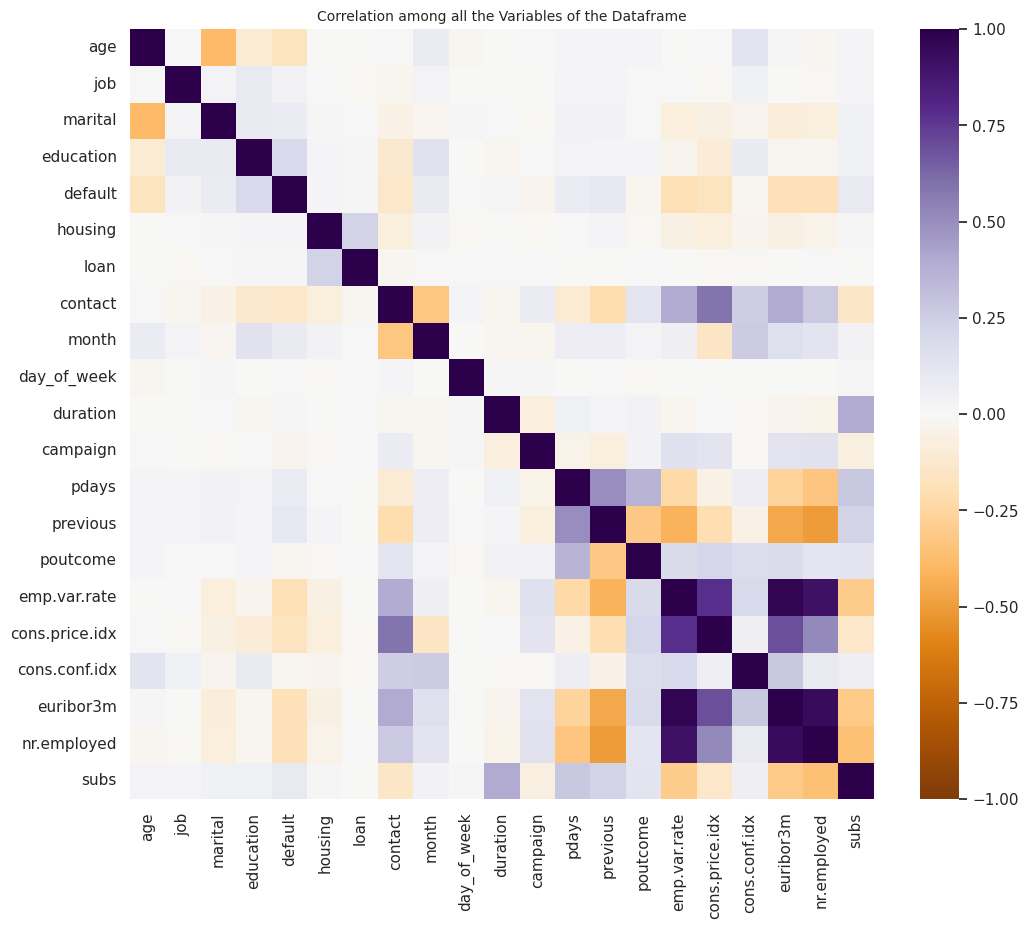

In [ ]:
plt.figure(figsize=(12,10))
plt.title("Correlation among all the Variables of the Dataframe", size=10)
sns.heatmap(data=correlations,vmin=-1,vmax=1,cmap='PuOr')
plt.show()

##Models

#####Setting up Target variable

In [16]:
data['subs'].value_counts()

0    36537
1     4639
Name: subs, dtype: int64

In [17]:
target1=data[data['subs']==1]
target0=data[data['subs']==0]

In [18]:
target1=resample(target1,replace=True,n_samples=len(target0),random_state=1)

In [19]:
target=pd.concat([target0,target1])

In [20]:
target['subs'].value_counts()

0    36537
1    36537
Name: subs, dtype: int64

In [21]:
targetdata=target
np.shape(targetdata)

(73074, 22)

#####Checking the target variable

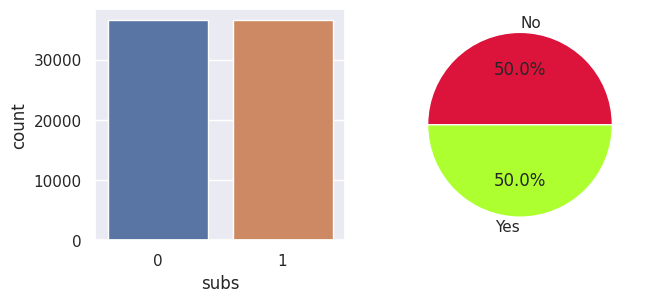

In [22]:
plt.figure(figsize=(4,3), facecolor='w')
plt.subplots_adjust(right=1.5)
plt.subplot(121)
sns.countplot(x='subs', data=targetdata)
plt.subplot(122)
labels=["No","Yes"]
plt.pie(targetdata["subs"].value_counts(),autopct="%1.1f%%",labels=labels,colors=["crimson","greenyellow"])
plt.show()

#####Applying models

In [23]:
data2=data
y = data2['subs']
X = data2.drop(['subs','Age_Group'], axis=1)
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=1)

In [26]:
print(train_x)

       age  job  marital  education  default  housing  loan  contact  month  \
26920   29    8        2          2        0        2     1        1     11   
29729   33    4        3          2        0        2     2        1      4   
30925   39    8        2          2        1        2     2        1      5   
23849   51    5        2          5        1        1     1        1      8   
29065   34    8        3          2        1        1     1        1      4   
...    ...  ...      ...        ...      ...      ...   ...      ...    ...   
7814    60    5        2          5        1        1     1        2      6   
32521   29    2        3          1        0        2     1        1      5   
5193    35   10        2          4        1        2     2        2      5   
12173   38    2        2          1        1        0     0        2      7   
33013   27    2        2          1        0        2     1        1      5   

       day_of_week  duration  campaign  pdays  prev

In [27]:
train_x.shape

(32940, 20)

In [28]:
train_y.shape

(32940,)

In [29]:
test_x.shape

(8236, 20)

In [30]:
test_y.shape

(8236,)

In [24]:
from sklearn import metrics

######Logistic Regression

In [25]:
logistic_regression = LogisticRegression(max_iter=1000)
#train the model
logistic_regression.fit(train_x, train_y)
#predict values
y_pred = logistic_regression.predict(test_x)
#check model accuracy
lr_accuracy = metrics.accuracy_score(test_y, y_pred)
lr_accuracy_percentage = 100 * lr_accuracy
print("Accuracy percentage : ",lr_accuracy_percentage)
mse=metrics.mean_squared_error(test_y, y_pred)
mse_per = 100 * mse
print("Mean squared error : ",mse_per)
print("Confusion matrix : \n",confusion_matrix(test_y, y_pred))
print(classification_report(test_y,y_pred))

Accuracy percentage :  91.44001942690626
Mean squared error :  8.559980573093736
Confusion matrix : 
 [[7135  179]
 [ 526  396]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7314
           1       0.69      0.43      0.53       922

    accuracy                           0.91      8236
   macro avg       0.81      0.70      0.74      8236
weighted avg       0.90      0.91      0.91      8236



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
lrfpr,lrtpr,lrthresholds = metrics.roc_curve(test_y,logistic_regression.predict_proba(test_x)[:,1],pos_label=1)
#calculate the accuracy for each threshold
lraccuracies = []
for threshold in lrthresholds:
    y_pred_threshold = np.where(logistic_regression.predict_proba(test_x)[:, 1] > threshold, 1, 0)
    accuracy = accuracy_score(test_y, y_pred_threshold)
    lraccuracies.append(accuracy)

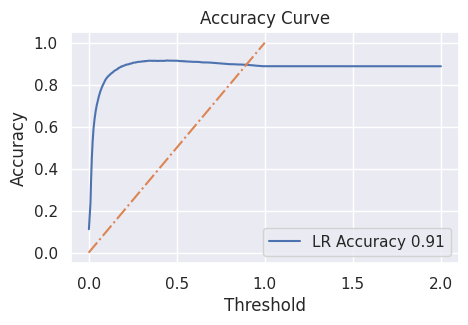

In [27]:
#accuracy curve
plt.figure(figsize=(5,3))
plt.plot(lrthresholds, lraccuracies, label='LR Accuracy %.2f'% lr_accuracy)
plt.plot([0, 1], [0, 1], linestyle='-.')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend(loc="lower right")
plt.show()

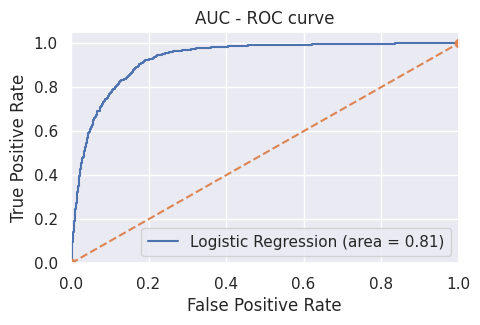

In [28]:
#ROC curve
plt.figure(figsize=(5,3))
plt.plot(lrfpr,lrtpr,label="Logistic Regression (area = %0.2f)"%metrics.roc_auc_score(y_pred, test_y))
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.plot([0,1],[0,1],'o--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC - ROC curve")
plt.legend(loc="lower right")
plt.show()

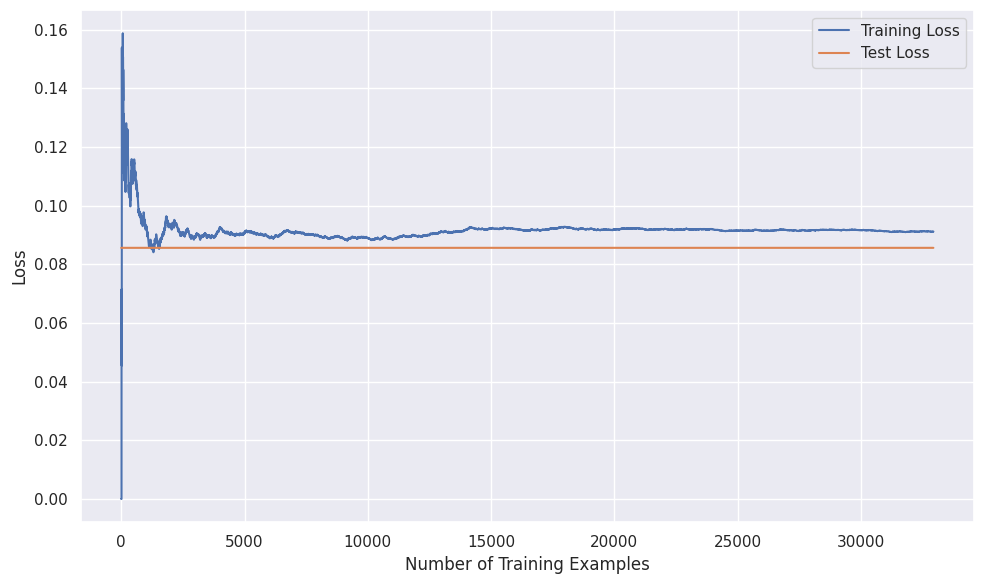

In [ ]:
from sklearn.metrics import mean_squared_error
#X = data[:, :-1]
#y = data[:, -1]
# Generate the loss curve
train_loss = []
test_loss = []

for i in range(1, train_x.shape[0] + 1):
    y_train_pred = logistic_regression.predict(train_x[:i])
    y_test_pred = logistic_regression.predict(test_x)
    train_loss.append(mean_squared_error(train_y[:i], y_train_pred))
    test_loss.append(mean_squared_error(test_y, y_test_pred))

# Plot the loss curve
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Test Loss')
plt.xlabel('Number of Training Examples')
plt.ylabel('Loss')
plt.legend()
plt.show()

######SVM

In [76]:
svc = SVC(kernel='poly',C=0.5,random_state=1,probability=True)
svc.fit(train_x, train_y)
svc.score(test_x, test_y)
y_pred = svc.predict(test_x)
svm_accuracy = metrics.accuracy_score(test_y, y_pred)
svm_accuracy_percentage = 100 * svm_accuracy
print("Accuracy percentage : ",svm_accuracy_percentage)
mse=metrics.mean_squared_error(test_y, y_pred)
mse_per = 100 * mse
print("Mean squared error : ",mse_per)
print("Confusion matrix : \n",confusion_matrix(test_y, y_pred))
print(classification_report(test_y,y_pred))

Accuracy percentage :  89.19378338999515
Mean squared error :  10.806216610004856
Confusion matrix : 
 [[7280   34]
 [ 856   66]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7314
           1       0.66      0.07      0.13       922

    accuracy                           0.89      8236
   macro avg       0.78      0.53      0.54      8236
weighted avg       0.87      0.89      0.85      8236



In [77]:
svmfpr,svmtpr,svmthresholds = metrics.roc_curve(test_y,svc.predict_proba(test_x)[:,1],pos_label=1)
#calculate the accuracy for each threshold
svmaccuracies = []
for threshold in svmthresholds:
    y_pred_threshold = np.where(svc.predict_proba(test_x)[:, 1] > threshold, 1, 0)
    accuracy = accuracy_score(test_y, y_pred_threshold)
    svmaccuracies.append(accuracy)

KeyboardInterrupt: ignored

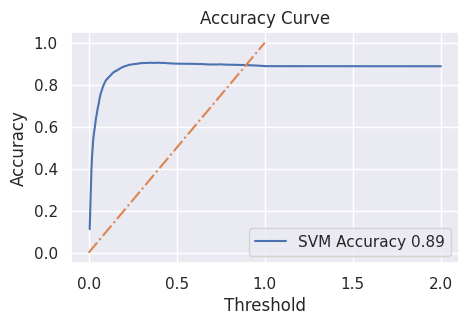

In [76]:
#accuracy curve
plt.figure(figsize=(5,3))
plt.plot(svmthresholds, svmaccuracies, label='SVM Accuracy %.2f'% svm_accuracy)
plt.plot([0, 1], [0, 1], linestyle='-.')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend(loc="lower right")
plt.show()

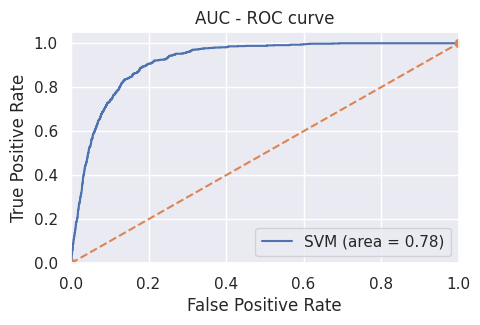

In [77]:
#ROC curve
plt.figure(figsize=(5,3))
plt.plot(svmfpr,svmtpr,label="SVM (area = %0.2f)"%metrics.roc_auc_score(y_pred, test_y))
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.plot([0,1],[0,1],'o--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC - ROC curve")
plt.legend(loc="lower right")
plt.show()

######Naive Bayes

In [79]:
nb=GaussianNB()
nb.fit(train_x,train_y)
y_pred=nb.predict(test_x)
nb_accuracy = metrics.accuracy_score(test_y, y_pred)
nb_accuracy_percentage = 100 * nb_accuracy
print("Accuracy percentage : ", nb_accuracy_percentage)
mse=metrics.mean_squared_error(test_y, y_pred)
mse_per = 100 * mse
print("Mean squared error : ",mse_per)
print("Confusion matrix : \n",confusion_matrix(test_y, y_pred))
print(classification_report(test_y,y_pred))

Accuracy percentage :  84.68916949975717
Mean squared error :  15.310830500242837
Confusion matrix : 
 [[6411  903]
 [ 358  564]]
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      7314
           1       0.38      0.61      0.47       922

    accuracy                           0.85      8236
   macro avg       0.67      0.74      0.69      8236
weighted avg       0.88      0.85      0.86      8236



In [54]:
nbfpr,nbtpr,nbthresholds = metrics.roc_curve(test_y,nb.predict_proba(test_x)[:,1],pos_label=1)
#calculate the accuracy for each threshold
nbaccuracies = []
for threshold in nbthresholds:
    y_pred_threshold = np.where(nb.predict_proba(test_x)[:, 1] > threshold, 1, 0)
    accuracy = accuracy_score(test_y, y_pred_threshold)
    nbaccuracies.append(accuracy)

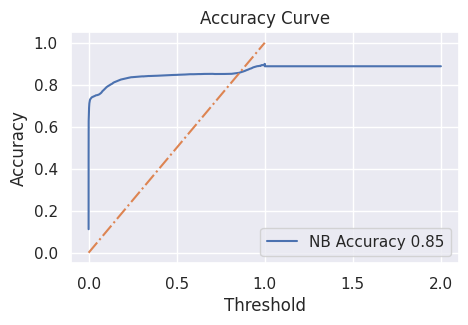

In [68]:
#accuracy curve
plt.figure(figsize=(5,3))
plt.plot(nbthresholds, nbaccuracies, label='NB Accuracy %.2f'% nb_accuracy)
plt.plot([0, 1], [0, 1], linestyle='-.')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend(loc="lower right")
plt.show()

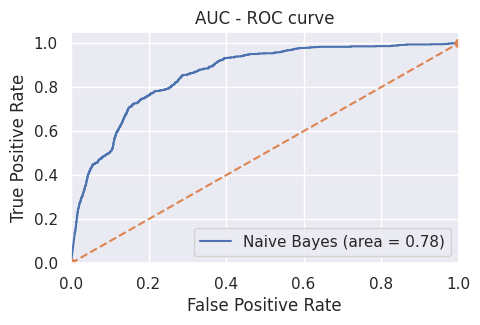

In [73]:
#ROC curve
plt.figure(figsize=(5,3))
plt.plot(nbfpr,nbtpr,label="Naive Bayes (area = %0.2f)"%metrics.roc_auc_score(y_pred, test_y))
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.plot([0,1],[0,1],'o--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC - ROC curve")
plt.legend(loc="lower right")
plt.show()

######KNN

In [ ]:
error_rate = []
for i in range(1,30):
  knn = KNeighborsClassifier(i)
  knn.fit(train_x,train_y)
  pred=knn.predict(test_x)
  error_rate.append(np.mean(pred!=test_y))

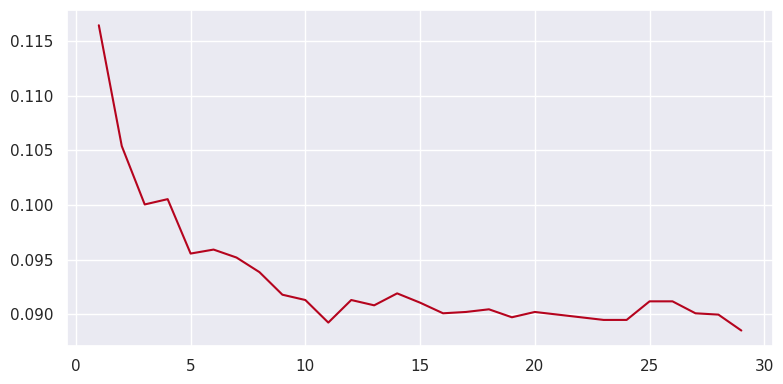

In [ ]:
plt.plot(range(1,30),error_rate,color='#b5041e')

In [29]:
knn=KNeighborsClassifier(n_neighbors=22)
knn.fit(train_x,train_y)
y_pred=knn.predict(test_x)
knn_accuracy = metrics.accuracy_score(test_y, y_pred)
knn_accuracy_percentage = 100 * knn_accuracy
print("Accuracy percentage : ", knn_accuracy_percentage)
mse=metrics.mean_squared_error(test_y, y_pred)
mse_per = 100 * mse
print("Mean squared error : ",mse_per)
print("Confusion matrix : \n",confusion_matrix(test_y, y_pred))
print(classification_report(test_y,y_pred))

Accuracy percentage :  91.02719766877125
Mean squared error :  8.972802331228753
Confusion matrix : 
 [[7052  262]
 [ 477  445]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7314
           1       0.63      0.48      0.55       922

    accuracy                           0.91      8236
   macro avg       0.78      0.72      0.75      8236
weighted avg       0.90      0.91      0.91      8236



In [30]:
knnfpr,knntpr,knnthresholds = metrics.roc_curve(test_y,knn.predict_proba(test_x)[:,1],pos_label=1)
#calculate the accuracy for each threshold
knnaccuracies = []
for threshold in knnthresholds:
    y_pred_threshold = np.where(knn.predict_proba(test_x)[:, 1] > threshold, 1, 0)
    accuracy = accuracy_score(test_y, y_pred_threshold)
    knnaccuracies.append(accuracy)

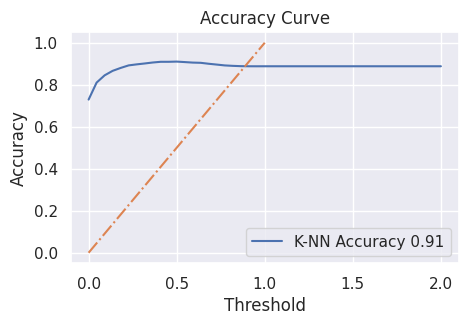

In [31]:
#accuracy curve
plt.figure(figsize=(5,3))
plt.plot(knnthresholds, knnaccuracies, label='K-NN Accuracy %.2f'% knn_accuracy)
plt.plot([0, 1], [0, 1], linestyle='-.')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend(loc="lower right")
plt.show()

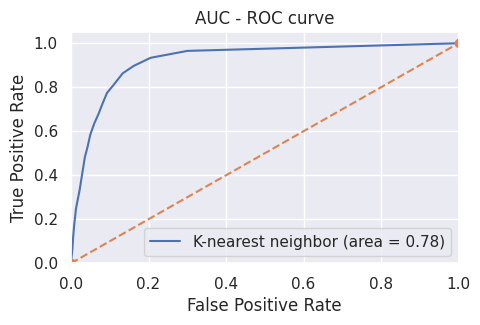

In [32]:
#ROC curve
plt.figure(figsize=(5,3))
plt.plot(knnfpr,knntpr,label="K-nearest neighbor (area = %0.2f)"%metrics.roc_auc_score(y_pred, test_y))
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.plot([0,1],[0,1],'o--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC - ROC curve")
plt.legend(loc="lower right")
plt.show()

######Decision Tree

In [33]:
dtree=DecisionTreeClassifier(max_depth=5,random_state=1,max_features=None)
dtree.fit(train_x,train_y)
y_pred=dtree.predict(test_x)
dtree_accuracy = metrics.accuracy_score(test_y, y_pred)
dtree_accuracy_percentage = 100 * dtree_accuracy
print("Accuracy percentage : ", dtree_accuracy_percentage)
mse=metrics.mean_squared_error(test_y, y_pred)
mse_per = 100 * mse
print("Mean squared error : ",mse_per)
print("Confusion matrix : \n",confusion_matrix(test_y, y_pred))
print(classification_report(test_y,y_pred))

Accuracy percentage :  91.68285575522098
Mean squared error :  8.31714424477902
Confusion matrix : 
 [[7026  288]
 [ 397  525]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      7314
           1       0.65      0.57      0.61       922

    accuracy                           0.92      8236
   macro avg       0.80      0.77      0.78      8236
weighted avg       0.91      0.92      0.91      8236



In [34]:
dtreefpr,dtreetpr,dtreethresholds = metrics.roc_curve(test_y,dtree.predict_proba(test_x)[:,1],pos_label=1)
#calculate the accuracy for each threshold
dtreeaccuracies = []
for threshold in dtreethresholds:
    y_pred_threshold = np.where(dtree.predict_proba(test_x)[:, 1] > threshold, 1, 0)
    accuracy = accuracy_score(test_y, y_pred_threshold)
    dtreeaccuracies.append(accuracy)

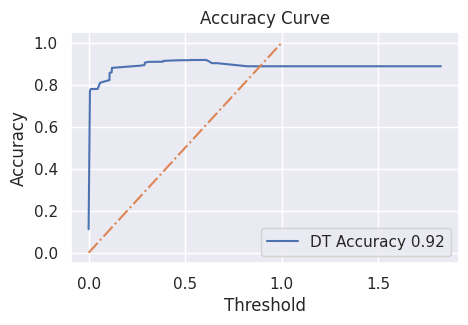

In [35]:
#accuracy curve
plt.figure(figsize=(5,3))
plt.plot(dtreethresholds, dtreeaccuracies, label='DT Accuracy %.2f'% dtree_accuracy)
plt.plot([0, 1], [0, 1], linestyle='-.')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend(loc="lower right")
plt.show()

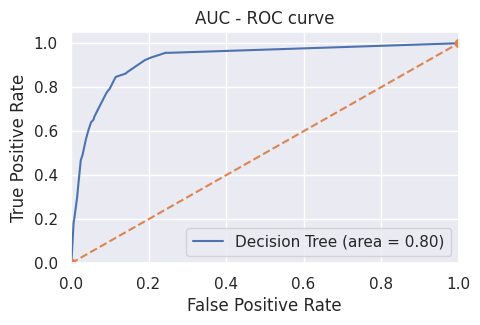

In [36]:
#ROC curve
plt.figure(figsize=(5,3))
plt.plot(dtreefpr,dtreetpr,label="Decision Tree (area = %0.2f)"%metrics.roc_auc_score(y_pred, test_y))
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.plot([0,1],[0,1],'o--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC - ROC curve")
plt.legend(loc="lower right")
plt.show()

######Random Forest

In [37]:
rf = RandomForestClassifier(n_estimators=100, random_state=42,max_depth=50)
rf.fit(train_x,train_y)
y_pred = rf.predict(test_x)
rf_accuracy = metrics.accuracy_score(test_y, y_pred)
rf_accuracy_percentage = 100 * rf_accuracy
print("Accuracy percentage : ", rf_accuracy_percentage)
mse=metrics.mean_squared_error(test_y, y_pred)
mse_per = 100 * mse
print("Mean squared error : ",mse_per)
print("Confusion matrix : \n",confusion_matrix(test_y, y_pred))
print(classification_report(test_y,y_pred))

Accuracy percentage :  91.63428848955803
Mean squared error :  8.365711510441962
Confusion matrix : 
 [[7038  276]
 [ 413  509]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7314
           1       0.65      0.55      0.60       922

    accuracy                           0.92      8236
   macro avg       0.80      0.76      0.77      8236
weighted avg       0.91      0.92      0.91      8236



In [38]:
rffpr,rftpr,rfthresholds = metrics.roc_curve(test_y,rf.predict_proba(test_x)[:,1],pos_label=1)
#calculate the accuracy for each threshold
rfaccuracies = []
for threshold in rfthresholds:
    y_pred_threshold = np.where(rf.predict_proba(test_x)[:, 1] > threshold, 1, 0)
    accuracy = accuracy_score(test_y, y_pred_threshold)
    rfaccuracies.append(accuracy)

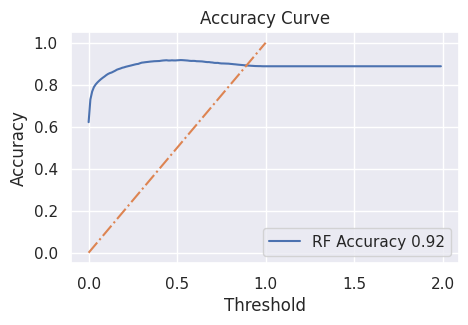

In [39]:
#accuracy curve
plt.figure(figsize=(5,3))
plt.plot(rfthresholds, rfaccuracies, label='RF Accuracy %.2f'% rf_accuracy)
plt.plot([0, 1], [0, 1], linestyle='-.')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend(loc="lower right")
plt.show()

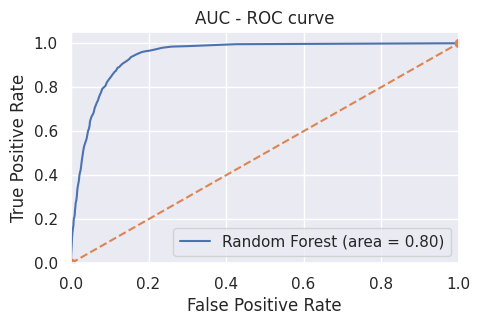

In [40]:
#ROC curve
plt.figure(figsize=(5,3))
plt.plot(rffpr,rftpr,label="Random Forest (area = %0.2f)"%metrics.roc_auc_score(y_pred, test_y))
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.plot([0,1],[0,1],'o--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC - ROC curve")
plt.legend(loc="lower right")
plt.show()

######Gradient Boosting

In [41]:
gbc =  GradientBoostingClassifier(random_state=1,max_depth=3,learning_rate=0.1,n_estimators=100)
gbc.fit(train_x,train_y)
y_pred= gbc.predict(test_x)
gbc_accuracy = metrics.accuracy_score(test_y, y_pred)
gbc_accuracy_percentage = 100 * gbc_accuracy
print("Accuracy percentage : ", gbc_accuracy_percentage)
mse=metrics.mean_squared_error(test_y, y_pred)
mse_per = 100 * mse
print("Mean squared error : ",mse_per)
print("Confusion matrix : \n",confusion_matrix(test_y,y_pred))
print(classification_report(test_y,y_pred))

Accuracy percentage :  92.095677513356
Mean squared error :  7.904322486644003
Confusion matrix : 
 [[7062  252]
 [ 399  523]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      7314
           1       0.67      0.57      0.62       922

    accuracy                           0.92      8236
   macro avg       0.81      0.77      0.79      8236
weighted avg       0.92      0.92      0.92      8236



In [42]:
print("AUC Score: %f" % metrics.roc_auc_score(y_pred, test_y))

AUC Score: 0.810680


In [43]:
gbcfpr,gbctpr,gbcthresholds = metrics.roc_curve(test_y,gbc.predict_proba(test_x)[:,1],pos_label=1)
#calculate the accuracy for each threshold
gbcaccuracies = []
for threshold in gbcthresholds:
    y_pred_threshold = np.where(gbc.predict_proba(test_x)[:, 1] > threshold, 1, 0)
    accuracy = accuracy_score(test_y, y_pred_threshold)
    gbcaccuracies.append(accuracy)

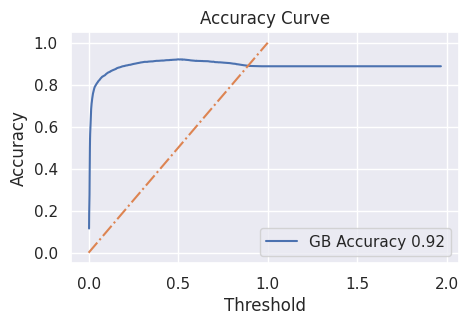

In [44]:
#accuracy curve
plt.figure(figsize=(5,3))
plt.plot(gbcthresholds, gbcaccuracies, label='GB Accuracy %.2f'% gbc_accuracy)
plt.plot([0, 1], [0, 1], linestyle='-.')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend(loc="lower right")
plt.show()

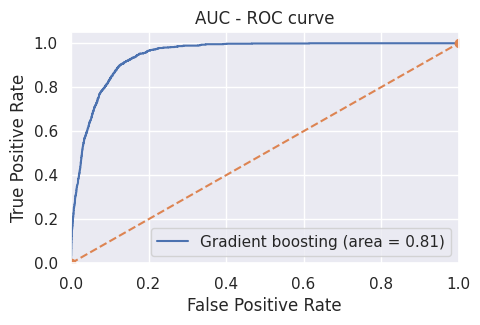

In [45]:
#ROC curve
plt.figure(figsize=(5,3))
plt.plot(gbcfpr,gbctpr,label="Gradient boosting (area = %0.2f)"%metrics.roc_auc_score(y_pred, test_y))
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.plot([0,1],[0,1],'o--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC - ROC curve")
plt.legend(loc="lower right")
plt.show()

######CAT Boost

In [46]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.7 MB/s eta 0:00:00


In [47]:
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score

In [48]:
cat = CatBoostClassifier(random_state=1,n_estimators = 2000,learning_rate=0.05)
cat.fit(train_x, train_y)
y_pred = cat.predict(test_x)

0:	learn: 0.6113087	total: 55.9ms	remaining: 1m 51s
1:	learn: 0.5500861	total: 65.9ms	remaining: 1m 5s
2:	learn: 0.4931185	total: 74.3ms	remaining: 49.5s
3:	learn: 0.4462497	total: 82.7ms	remaining: 41.3s
4:	learn: 0.4074878	total: 91.2ms	remaining: 36.4s
5:	learn: 0.3745819	total: 99.4ms	remaining: 33s
6:	learn: 0.3490075	total: 108ms	remaining: 30.7s
7:	learn: 0.3284072	total: 115ms	remaining: 28.7s
8:	learn: 0.3084035	total: 123ms	remaining: 27.3s
9:	learn: 0.2946296	total: 132ms	remaining: 26.3s
10:	learn: 0.2824322	total: 140ms	remaining: 25.3s
11:	learn: 0.2734004	total: 148ms	remaining: 24.6s
12:	learn: 0.2609757	total: 157ms	remaining: 24s
13:	learn: 0.2503351	total: 165ms	remaining: 23.4s
14:	learn: 0.2433843	total: 174ms	remaining: 23s
15:	learn: 0.2385868	total: 183ms	remaining: 22.7s
16:	learn: 0.2339049	total: 192ms	remaining: 22.4s
17:	learn: 0.2287514	total: 201ms	remaining: 22.1s
18:	learn: 0.2251589	total: 209ms	remaining: 21.8s
19:	learn: 0.2226116	total: 217ms	remain

In [49]:
cm = confusion_matrix(test_y, y_pred)
print(cm)
accuracy_score(test_y, y_pred)

[[7006  308]
 [ 407  515]]


0.9131860126274891

In [50]:
accuracies_c = cross_val_score(estimator = cat, X = train_x, y = train_y, cv = 10)
cat_accuracy_percentage = accuracies_c.mean()*100
cat_accuracy=accuracies_c.mean()
print("Accuracy: {:.2f} %".format(cat_accuracy*100))
print("Standard Deviation: {:.2f} %".format(accuracies_c.std()*100))

Streaming output truncated to the last 5000 lines.
1002:	learn: 0.1179447	total: 11.3s	remaining: 11.2s
1003:	learn: 0.1179062	total: 11.3s	remaining: 11.2s
1004:	learn: 0.1178899	total: 11.3s	remaining: 11.2s
1005:	learn: 0.1178647	total: 11.3s	remaining: 11.2s
1006:	learn: 0.1178227	total: 11.3s	remaining: 11.2s
1007:	learn: 0.1177985	total: 11.3s	remaining: 11.2s
1008:	learn: 0.1177726	total: 11.3s	remaining: 11.1s
1009:	learn: 0.1177238	total: 11.4s	remaining: 11.1s
1010:	learn: 0.1176910	total: 11.4s	remaining: 11.1s
1011:	learn: 0.1176602	total: 11.4s	remaining: 11.1s
1012:	learn: 0.1176178	total: 11.4s	remaining: 11.1s
1013:	learn: 0.1175800	total: 11.4s	remaining: 11.1s
1014:	learn: 0.1175491	total: 11.4s	remaining: 11.1s
1015:	learn: 0.1175110	total: 11.4s	remaining: 11.1s
1016:	learn: 0.1174876	total: 11.4s	remaining: 11s
1017:	learn: 0.1174510	total: 11.4s	remaining: 11s
1018:	learn: 0.1174128	total: 11.4s	remaining: 11s
1019:	learn: 0.1173762	total: 11.4s	remaining: 11s
102

In [51]:
catfpr,cattpr,catthresholds = metrics.roc_curve(test_y,cat.predict_proba(test_x)[:,1],pos_label=1)
#calculate the accuracy for each threshold
cataccuracies = []
for threshold in catthresholds:
    y_pred_threshold = np.where(cat.predict_proba(test_x)[:, 1] > threshold, 1, 0)
    accuracy = accuracy_score(test_y, y_pred_threshold)
    cataccuracies.append(accuracy)

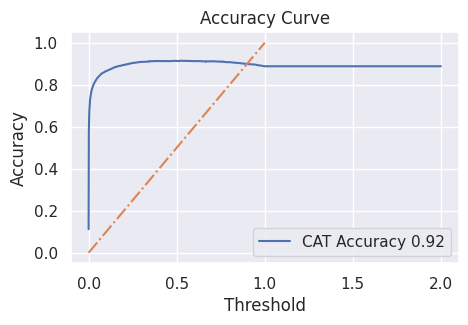

In [52]:
#accuracy curve
plt.figure(figsize=(5,3))
plt.plot(catthresholds, cataccuracies, label='CAT Accuracy %.2f'% cat_accuracy)
plt.plot([0, 1], [0, 1], linestyle='-.')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend(loc="lower right")
plt.show()

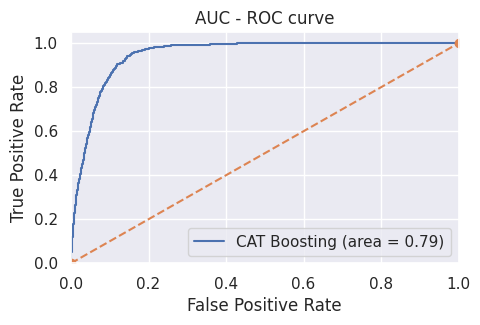

In [53]:
#ROC curve
plt.figure(figsize=(5,3))
plt.plot(catfpr,cattpr,label="CAT Boosting (area = %0.2f)"%metrics.roc_auc_score(y_pred, test_y))
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.plot([0,1],[0,1],'o--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC - ROC curve")
plt.legend(loc="lower right")
plt.show()

######XGBoost

In [ ]:
#!pip install xgboost

In [54]:
from xgboost import XGBClassifier

In [55]:
xgb = XGBClassifier(n_estimators=2000, eta=0.025)
evalset = [(train_x, train_y), (test_x,test_y)]
xgb.fit(train_x, train_y, eval_metric='logloss', eval_set=evalset)
yhat = xgb.predict(test_x)
score = accuracy_score(test_y, yhat)
print('Accuracy: %.2f' % score)

[0]	validation_0-logloss:0.35938	validation_1-logloss:0.35822
[1]	validation_0-logloss:0.35186	validation_1-logloss:0.35090
[2]	validation_0-logloss:0.34482	validation_1-logloss:0.34398
[3]	validation_0-logloss:0.33819	validation_1-logloss:0.33749
[4]	validation_0-logloss:0.33195	validation_1-logloss:0.33140
[5]	validation_0-logloss:0.32603	validation_1-logloss:0.32563
[6]	validation_0-logloss:0.32047	validation_1-logloss:0.32020
[7]	validation_0-logloss:0.31516	validation_1-logloss:0.31501
[8]	validation_0-logloss:0.31012	validation_1-logloss:0.31007
[9]	validation_0-logloss:0.30531	validation_1-logloss:0.30540
[10]	validation_0-logloss:0.30072	validation_1-logloss:0.30091
[11]	validation_0-logloss:0.29633	validation_1-logloss:0.29660


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-logloss:0.29212	validation_1-logloss:0.29254
[13]	validation_0-logloss:0.28811	validation_1-logloss:0.28863
[14]	validation_0-logloss:0.28416	validation_1-logloss:0.28481
[15]	validation_0-logloss:0.28038	validation_1-logloss:0.28116
[16]	validation_0-logloss:0.27677	validation_1-logloss:0.27764
[17]	validation_0-logloss:0.27335	validation_1-logloss:0.27436
[18]	validation_0-logloss:0.27001	validation_1-logloss:0.27114
[19]	validation_0-logloss:0.26678	validation_1-logloss:0.26804
[20]	validation_0-logloss:0.26368	validation_1-logloss:0.26503
[21]	validation_0-logloss:0.26071	validation_1-logloss:0.26217
[22]	validation_0-logloss:0.25788	validation_1-logloss:0.25946
[23]	validation_0-logloss:0.25510	validation_1-logloss:0.25683
[24]	validation_0-logloss:0.25242	validation_1-logloss:0.25428
[25]	validation_0-logloss:0.24984	validation_1-logloss:0.25181
[26]	validation_0-logloss:0.24737	validation_1-logloss:0.24939
[27]	validation_0-logloss:0.24498	validation_1-logloss:

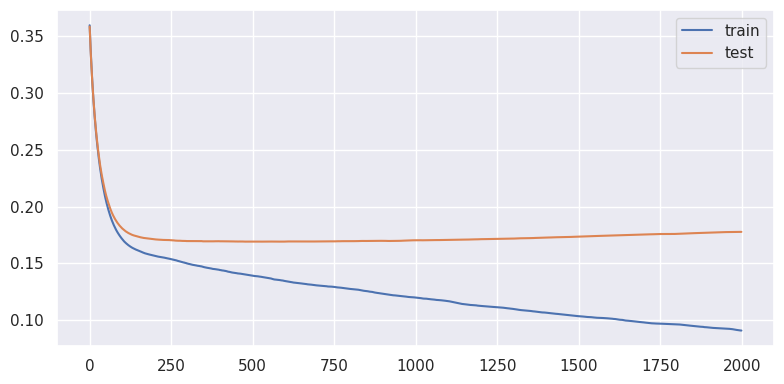

In [ ]:
# retrieve performance metrics
results = xgb.evals_result()
# plot learning curves
plt.plot(results['validation_0']['logloss'], label='train')
plt.plot(results['validation_1']['logloss'], label='test')
# show the legend
plt.legend()
# show the plot
plt.show()

In [56]:
xg_accuracy_percentage = score * 100.0
print("Accuracy: %.2f%%" % (score * 100.0))

Accuracy: 91.71%


In [57]:
xgbfpr,xgbtpr,xgbthresholds = metrics.roc_curve(test_y,xgb.predict_proba(test_x)[:,1],pos_label=1)
#calculate the accuracy for each threshold
xgbaccuracies = []
for threshold in xgbthresholds:
    y_pred_threshold = np.where(xgb.predict_proba(test_x)[:, 1] > threshold, 1, 0)
    accuracy = accuracy_score(test_y, y_pred_threshold)
    xgbaccuracies.append(accuracy)

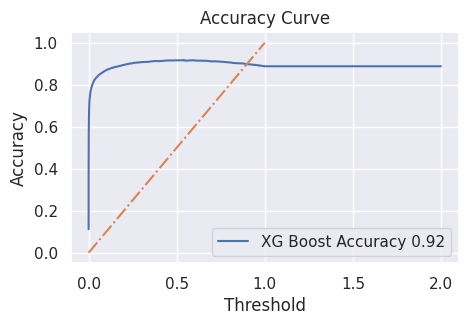

In [59]:
#accuracy curve
plt.figure(figsize=(5,3))
plt.plot(xgbthresholds, xgbaccuracies, label='XG Boost Accuracy %.2f'% score)
plt.plot([0, 1], [0, 1], linestyle='-.')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend(loc="lower right")
plt.show()

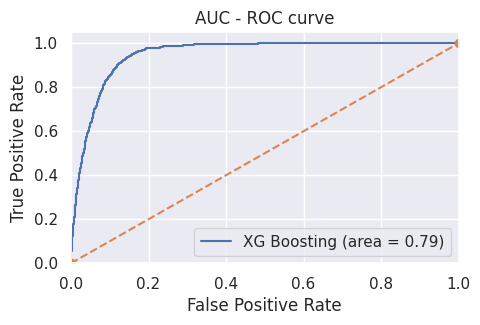

In [60]:
#ROC curve
plt.figure(figsize=(5,3))
plt.plot(xgbfpr,xgbtpr,label="XG Boosting (area = %0.2f)"%metrics.roc_auc_score(y_pred, test_y))
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.plot([0,1],[0,1],'o--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC - ROC curve")
plt.legend(loc="lower right")
plt.show()

######K-means

In [61]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,5):
    km = KMeans(i)
    km.fit(train_x,train_y)
    wcss.append(km.inertia_)
np.array(wcss)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2.37305267e+09, 1.03062467e+09, 6.45640985e+08, 4.78219141e+08])

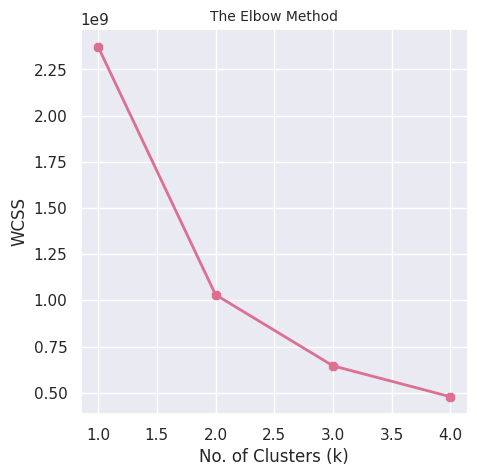

In [62]:
fig, ax = plt.subplots(figsize=(5,5))
ax = plt.plot(range(1,5),wcss, linewidth=2, color="palevioletred", marker ="8")
plt.ylabel('WCSS')
plt.xlabel('No. of Clusters (k)')
plt.title('The Elbow Method', fontsize = 10)
plt.show()

In [63]:
kmeans = KMeans(n_clusters=2,random_state=1)
kmeans.fit(train_x,train_y)
y_pred = kmeans.predict(test_x)
kmeans_accuracy = metrics.accuracy_score(test_y, y_pred)
kmeans_accuracy_percentage = 100 * kmeans_accuracy
print("Accuracy percentage : ", kmeans_accuracy_percentage)
mse=metrics.mean_squared_error(test_y, y_pred)
mse_per = 100 * mse
print("Mean squared error : ",mse_per)
print("Confusion matrix : \n",confusion_matrix(test_y,y_pred))
print(classification_report(test_y,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy percentage :  86.59543467702768
Mean squared error :  13.404565322972317
Confusion matrix : 
 [[6697  617]
 [ 487  435]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      7314
           1       0.41      0.47      0.44       922

    accuracy                           0.87      8236
   macro avg       0.67      0.69      0.68      8236
weighted avg       0.87      0.87      0.87      8236



######Agglomerative clustering

In [72]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering()
ac.fit(train_x,train_y)

AgglomerativeClustering()

In [73]:
y_pred = ac.fit_predict(test_x)
ac_accuracy = metrics.accuracy_score(test_y, y_pred)
ac_accuracy_percentage = 100 * ac_accuracy
print("Accuracy percentage : ", ac_accuracy_percentage)
mse=metrics.mean_squared_error(test_y, y_pred)
mse_per = 100 * mse
print("Mean squared error : ",mse_per)
print("Confusion matrix : \n",confusion_matrix(test_y,y_pred))
print(classification_report(test_y,y_pred))

Accuracy percentage :  87.63963088878096
Mean squared error :  12.360369111219038
Confusion matrix : 
 [[6850  464]
 [ 554  368]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      7314
           1       0.44      0.40      0.42       922

    accuracy                           0.88      8236
   macro avg       0.68      0.67      0.68      8236
weighted avg       0.87      0.88      0.87      8236



In [85]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(test_y, test_x)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'{ac} (AUC = {roc_auc:.2f})')

# Plot random guess line
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Two Models')
plt.legend()
plt.show()

ValueError: ignored

#####Stacking CV Classifier

In [64]:
# Ensembling
from mlxtend.classifier import StackingCVClassifier

######Stacking CV

In [65]:
scv=StackingCVClassifier(classifiers=[xgb,gbc,dtree,rf], meta_classifier= gbc,verbose=1)
scv.fit(train_x,train_y)
scv_predicted = scv.predict(test_x)
scv_conf_matrix = confusion_matrix(test_y, scv_predicted)
scv_acc_score = accuracy_score(test_y, scv_predicted)
print("confussion matrix")
print(scv_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv_acc_score*100,'\n')
print(classification_report(test_y,scv_predicted))

Fitting 4 classifiers...
Fitting classifier1: xgbclassifier (1/4)
Fitting classifier2: gradientboostingclassifier (2/4)
Fitting classifier3: decisiontreeclassifier (3/4)
Fitting classifier4: randomforestclassifier (4/4)
confussion matrix
[[7024  290]
 [ 364  558]]


Accuracy of StackingCVClassifier: 92.05925206410879 

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      7314
           1       0.66      0.61      0.63       922

    accuracy                           0.92      8236
   macro avg       0.80      0.78      0.79      8236
weighted avg       0.92      0.92      0.92      8236



In [66]:
print({"Model":"Stacking Ensemble", "Accuracy":scv_acc_score*100})

{'Model': 'Stacking Ensemble', 'Accuracy': 92.05925206410879}


In [67]:
fpr,tpr,thresholds = metrics.roc_curve(test_y,scv.predict_proba(test_x)[:,1],pos_label=1)
#calculate the accuracy for each threshold
accuracies = []
for threshold in thresholds:
    y_pred_threshold = np.where(scv.predict_proba(test_x)[:, 1] > threshold, 1, 0)
    accuracy = accuracy_score(test_y, y_pred_threshold)
    accuracies.append(accuracy)

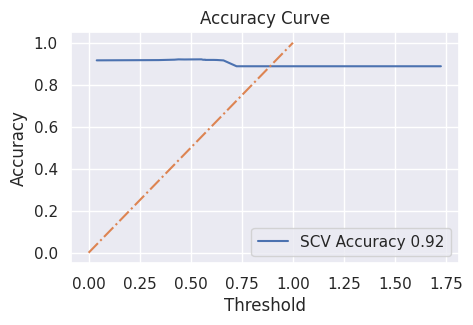

In [70]:
#accuracy curve
plt.figure(figsize=(5,3))
plt.plot(thresholds, accuracies, label='SCV Accuracy %.2f'% scv_acc_score)
plt.plot([0, 1], [0, 1], linestyle='-.')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend(loc="lower right")
plt.show()

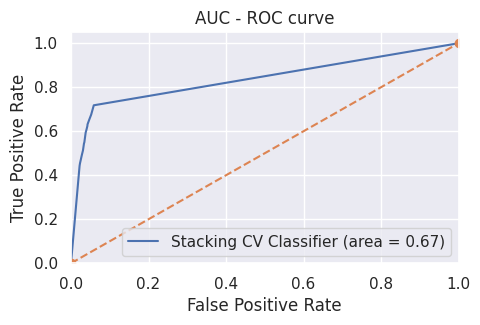

In [71]:
#ROC curve
plt.figure(figsize=(5,3))
plt.plot(fpr,tpr,label="Stacking CV Classifier (area = %0.2f)"%metrics.roc_auc_score(y_pred, test_y))
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.plot([0,1],[0,1],'o--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC - ROC curve")
plt.legend(loc="lower right")
plt.show()

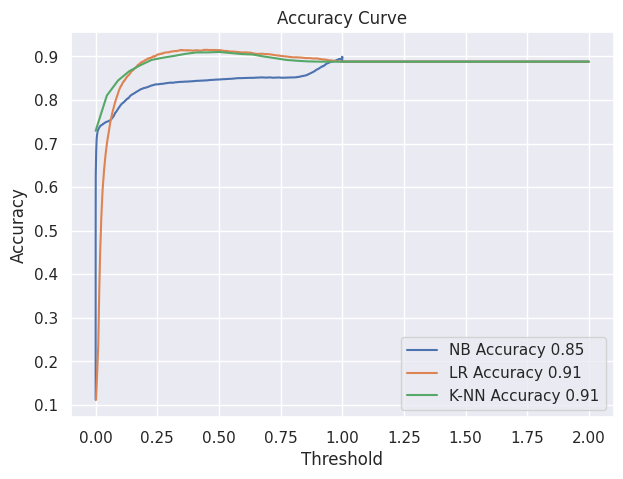

In [72]:
#accuracy curve
plt.figure(figsize=(7,5))
plt.plot(nbthresholds, nbaccuracies, label='NB Accuracy %.2f'% nb_accuracy)
plt.plot(lrthresholds, lraccuracies, label='LR Accuracy %.2f'% lr_accuracy)
plt.plot(knnthresholds, knnaccuracies, label='K-NN Accuracy %.2f'% knn_accuracy)
#plt.plot([0, 1], [0, 1], linestyle='-.')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend(loc="lower right")
plt.show()

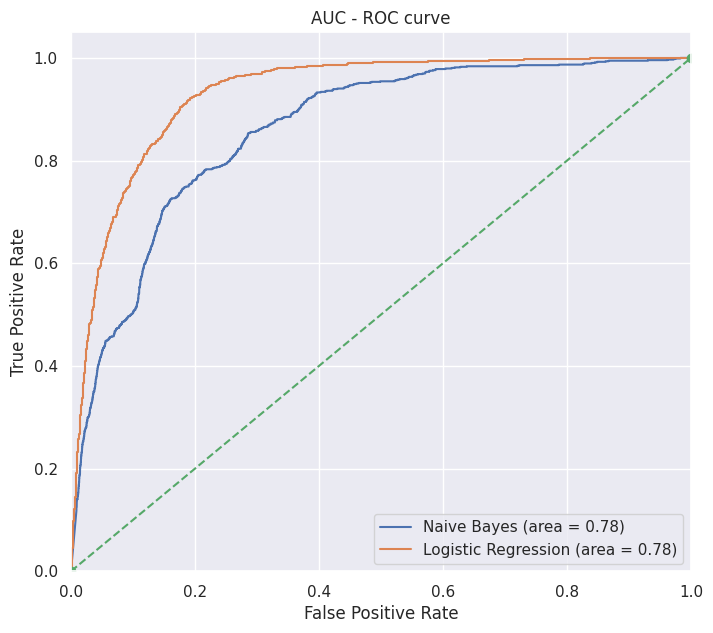

In [69]:
#ROC curve
plt.figure(figsize=(8,7))
plt.plot(nbfpr,nbtpr,label="Naive Bayes (area = %0.2f)"%metrics.roc_auc_score(y_pred, test_y))
plt.plot(lrfpr,lrtpr,label="Logistic Regression (area = %0.2f)"%metrics.roc_auc_score(y_pred, test_y))
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.plot([0,1],[0,1],'o--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC - ROC curve")
plt.legend(loc="lower right")
plt.show()

#####Evaluating Models

In [80]:
evaluate_smodels = pd.DataFrame({'Model': ['LR','SVM','NB','K-NN',
                                   'DT','RF','Gradient Boost','CATBoost','XGBoost','SCV'], 'Accuracy': [lr_accuracy_percentage, svm_accuracy_percentage,nb_accuracy_percentage,knn_accuracy_percentage,
                                                                                      dtree_accuracy_percentage,rf_accuracy_percentage, gbc_accuracy_percentage,cat_accuracy_percentage,xg_accuracy_percentage,scv_acc_score*100]})

evaluate_smodels= evaluate_smodels.sort_values('Accuracy',ascending=False)
print(evaluate_smodels)

            Model   Accuracy
6  Gradient Boost  92.095678
9             SCV  92.059252
8         XGBoost  91.707139
4              DT  91.682856
5              RF  91.634288
7        CATBoost  91.563449
0              LR  91.440019
3            K-NN  91.027198
1             SVM  89.193783
2              NB  84.689169


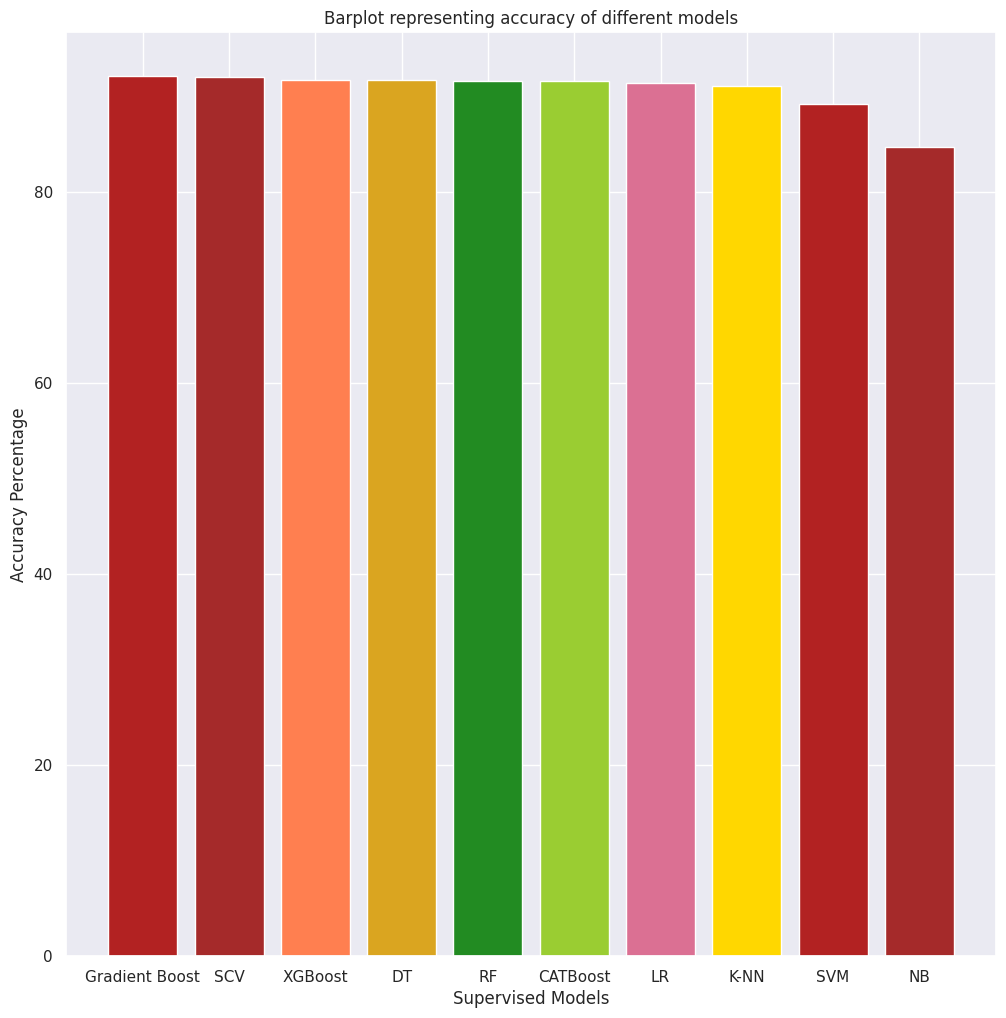

In [81]:
colors=["firebrick","brown","coral","goldenrod","forestgreen","yellowgreen" ,"palevioletred","gold"]
plt.figure(figsize=(12,12), facecolor='w')
plt.title("Barplot representing accuracy of different models")
plt.ylabel("Accuracy Percentage")
plt.xlabel("Supervised Models")
plt.bar(evaluate_smodels['Model'],evaluate_smodels['Accuracy'],color = colors)
plt.show()

In [ ]:
evaluate_umodels = pd.DataFrame({'Model': ['K Means','Agglomerative Clustering'], 'Accuracy': [kmeans_accuracy_percentage, ac_accuracy_percentage]})

evaluate_umodels= evaluate_umodels.sort_values('Accuracy',ascending=False)
print(evaluate_umodels)

                      Model   Accuracy
1  Agglomerative Clustering  87.639631
0                   K Means  86.595435


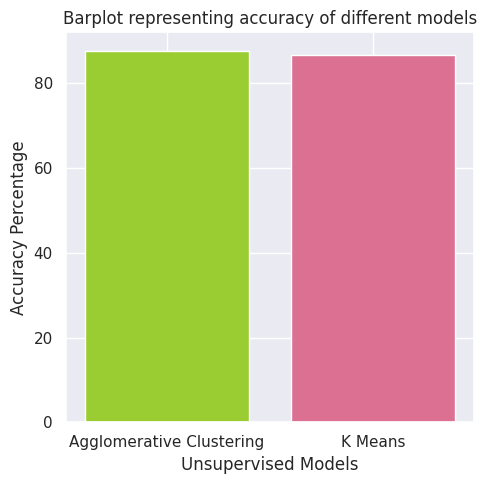

In [ ]:
colors=["yellowgreen" ,"palevioletred"]
plt.figure(figsize=(5,5), facecolor='w')
plt.title("Barplot representing accuracy of different models")
plt.ylabel("Accuracy Percentage")
plt.xlabel("Unsupervised Models")
plt.bar(evaluate_umodels['Model'],evaluate_umodels['Accuracy'],color = colors)
plt.show()

In [ ]:
#predictive model
age = int(input("Enter your age : "))
job = int(input("Enter your corresponding choice from the following jobs: \nadmin. :1, blue-collar :2, entrepreneur :3, housemaid :4, management :5, retired :6, self-employed :7, services :8, student :9, technician :10, unemployed :0, unknown :11\t"))
marital= int(input("Enter your corresponding choice from the following marital status: \ndivorced :1, married :2, single :3, unknown :0\t"))
education= int(input("Enter your education level : \nBasic :1, high.school :2, illiterate :3, professional.course :4, university.degree :5, unknown :0\t"))
default = int(input("Enter whether you have credit in default : \nno :1, yes :2, unknown :0\t"))
housing = int(input("Enter whether you have housing loan : \nno :1, yes :2, unknown :0\t"))
loan = int(input("Enter whether you have personal loan : \nno :1, yes :2, unknown :0\t"))
contact = int(input("Enter the contact communication type : \nCellular :1, telephone :2\t"))
month = int(input("Enter the last contact month of year : \njan :1, feb :2, mar :3, apr :4, may :5, jun :6, jul :7, aug :8, sep :9, oct :10, nov :11, dec :12\t"))
day_of_week= int(input("Enter the last contact day of the week : \nmon :1, tue :2, wed :3, thu :4, fri :5, sat :6, sun :7\t"))
duration = int(input("Enter the last contact duration (in secs) : "))
campaign = int(input("Enter the number of contacts performed during this campaign : "))
pdays= int(input("Enter the number of days (-1, if not contacted) that passed by after last contact : "))
previous = int(input("Enter the number of contacts performed before this campaign : "))
poutcome= int(input("Enter outcome of the previous marketing campaign :\nfailure :0, nonexistent :1, success :2\t"))
emp_var_rate = float(input("Enter employment variation rate : "))
cons_price_idx = float(input("Enter consumer price index : "))
cons_conf_idx = float(input("Enter consumer confidence index : "))
euribor3m = float(input("Enter euribor 3 month rate : "))
nr_employed = int(input("Enter number of employees : "))

newx=[[age, job, marital, education, default, housing, loan, contact, month, day_of_week, duration, campaign,
       pdays, previous, poutcome, emp_var_rate, cons_price_idx, cons_conf_idx, euribor3m, nr_employed]]

newy = scv.predict(newx)

print("Your subscription level is: ",newy)


Enter your age : 40
Enter your corresponding choice from the following jobs: 
admin. :1, blue-collar :2, entrepreneur :3, housemaid :4, management :5, retired :6, self-employed :7, services :8, student :9, technician :10, unemployed :0, unknown :11	1
Enter your corresponding choice from the following marital status: 
divorced :1, married :2, single :3, unknown :0	2
Enter your education level : 
Basic :1, high.school :2, illiterate :3, professional.course :4, university.degree :5, unknown :0	1
Enter whether you have credit in default : 
no :1, yes :2, unknown :0	1
Enter whether you have housing loan : 
no :1, yes :2, unknown :0	1
Enter whether you have personal loan : 
no :1, yes :2, unknown :0	1
Enter the contact communication type : 
Cellular :1, telephone :2	2
Enter the last contact month of year : 
jan :1, feb :2, mar :3, apr :4, may :5, jun :6, jul :7, aug :8, sep :9, oct :10, nov :11, dec :12	5
Enter the last contact day of the week : 
mon :1, tue :2, wed :3, thu :4, fri :5, sat :

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
